# Dataset Lluvia en Australia

![Picture title](image-20230412-234912.png)

### CRISP-DM 1

## Problemática Actual

Australia ha experimentado algunos de los mayores cambios climáticos de su historia durante la última década. Estos cambios han afectado a muchos sectores de la sociedad, incluyendo la agricultura. Para monitorear estos cambios, se han instalado diferentes sistemas de medición climática en distintos lugares del país.

Estos sistemas de medición proporcionan una gran cantidad de datos sobre el clima en diferentes regiones de Australia. Estos datos se registran diariamente y se utilizan para analizar los patrones climáticos a largo plazo y evaluar los efectos del cambio climático.

En particular, los gremios de agricultores en Australia han demostrado un gran interés en esta información. Debido a que los cambios climáticos tienen un impacto significativo en la producción agrícola, los agricultores necesitan estar al tanto de las condiciones del clima para poder planificar sus cultivos y mantener la producción. La información que se recopila a través de estos sistemas de medición climática les proporciona una herramienta valiosa para tomar decisiones informadas.

Además, esta información también es utilizada por otros sectores de la sociedad, como el turismo y la energía renovable, para evaluar los impactos del cambio climático en sus respectivas industrias.

En resumen, los sistemas de medición climática instalados en diferentes lugares de Australia son una herramienta clave para monitorear los cambios climáticos y sus efectos en la sociedad. Los gremios de agricultores en particular se benefician de estos datos, que les permiten tomar decisiones informadas sobre sus cultivos y mantener la producción en un clima en constante evolución.

## Acerca de la fuente de datos

El siguiente dataset presenta un total de 23 Columnas, los cuales se detallan a continuación: 

Date: Fecha en la que se realizó la observación meteorológica.
Location: El nombre común de la ubicación de la estación meteorológica.
MinTemp: La temperatura mínima registrada en grados centígrados(Celsius) durante las 24 horas previas a la hora de la observación.
MaxTemp: La temperatura máxima registrada en grados centígrados(Celsius) durante las 24 horas previas a la hora de la observación.
Rainfall: La cantidad de lluvia registrada en milímetros durante las 24 horas previas a la hora de la observación.
Evaporation: La cantidad de agua que se ha evaporado de una bandeja de clase A en las 24 horas previas a la hora de la observación. (La bandeja de clase A es una herramienta utilizada para medir la evaporación de una lámina de agua estandarizada expuesta a las mismas condiciones climáticas que la superficie circundante, para estimar la demanda de agua atmosférica y la pérdida de agua por evaporación.)
Sunshine: La cantidad de horas de sol brillante registradas durante las 24 horas previas a la hora de la observación.
WindGustDir: La dirección del viento en la que se registró la ráfaga más fuerte durante las 24 horas previas a la medianoche del día de la observación.(norte, sur, este, oeste, etc... )
WindGustSpeed: La velocidad en kilómetros por hora de la ráfaga de viento más fuerte registrada durante las 24 horas previas a la medianoche del día de la observación.
WindDir9am: La dirección del viento registrada a las 9 am.
WindDir3pm: La dirección del viento registrada a las 3 pm.
WindSpeed9am: La velocidad en kilómetros por hora del viento registrada a las 9 am.
WindSpeed3pm: La velocidad en kilómetros por hora del viento registrada a las 3 pm.
Humidity9am: La cantidad de agua en gramos por metro cúbico de aire registrada a las 9 am.
Humidity3pm: La cantidad de agua en gramos por metro cúbico de aire registrada a las 3 pm.
Pressure9am: La presión atmosférica registrada en pascales a las 9 am.
Pressure3pm: La presión atmosférica registrada en pascales a las 3 pm. (La presión atmosférica registrada en pascales es la fuerza que ejerce el peso de la atmósfera sobre la superficie terrestre, medida en unidades de presión llamadas pascales. Es decir, indica la cantidad de fuerza que se está ejerciendo por cada unidad de superficie.)
Cloud9am: La cantidad de octas (octavos) de la bóveda celeste cubiertos de nubes registrados a las 9 am.
Cloud3pm: La cantidad de octas (octavos) de la bóveda celeste cubiertos de nubes registrados a las 3 pm. (medida de la cantidad de nubes que cubren una porción del cielo en una determinada ubicación. Se divide el cielo en ocho partes iguales y se cuenta cuántas de estas partes están cubiertas por nubes.)
Temp9am: La temperatura en grados centígrados(Celsius) registrada a las 9 am.
Temp3pm: La temperatura en grados centígrados(Celsius) registrada a las 3 pm.
RainToday: Indica si llovió más de 1 mm en el día de la observación.
RainTomorrow: Predicción de si lloverá más de 1 mm el día después de la observación.

![Picture title](Tabla_Precipitacion.jpeg) 

![Picture title](image-20230415-004230.png)

![Picture title](Escala_Beaufort.jpeg)

# CRISP-DM 2

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree



In [2]:
# Carga de datos en un Dataset
df = pd.read_csv("weatherAUS.csv")

In [3]:
#Visualizacion primeros registros del dataset
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
#Visualizacion ultimos datos
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

In [5]:
#Visaulizamos algunas lineas de manera aleatoria
df.sample(5)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
108012  2015-12-15       Woomera     26.1     40.8       0.0         14.0   
74545   2016-04-17          Nhil      6.7     21.0       0.0          NaN   
145263  2016-12-11         Uluru     16.3     34.4       0.0          NaN   
100548  2011-11-01  MountGambier     10.8     16.0       0.0          2.6   
99053   2016-03-23      Adelaide     17.7     25.3       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
108012       7.4          NW           65.0        NNE  ...        21.0   
74545        NaN         ESE           43.0        SSE  ...        62.0   
145263       NaN           E           48.0          E  ...        16.0   
100548       0.6          SW           39.0         SW  ...        86.0   
99053        NaN          SW           33.0        SSW  ...        54.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
108012         12.0       1011.3       1007.8       NaN       4.0     32.4   
74545          34.0       1025.7       1020.7       NaN       NaN     11.9   
145263          9.0       1015.5       1011.2       NaN       NaN     27.9   
100548         67.0       1025.0       1022.2       8.0       7.0     11.9   
99053          62.0       1017.3       1018.8       NaN       NaN     21.1   

        Temp3pm  RainToday  RainTomorrow  
108012     39.5         No           Yes  
74545      19.8         No            No  
145263     33.1         No            No  
100548     15.7         No            No  
99053      22.1         No            No  

[5 rows x 23 columns]

In [6]:
#Muestra total de filas y columnas
df.shape

(145460, 23)

In [7]:
# Revisamos la cantidad de datos por columna
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [8]:
# Revisión de los tipos de datos
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
#Obtenemos las estadísticas de las columnas que solo tienen numeros
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [10]:
#Obtiene las estadisticas de todas las variables categoricas 
df.describe(include = ['object'])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2017-01-21  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [11]:
#Se realiza una lista con la cantidad total de columnas
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [12]:
# Muestra los valores nulos de todas las columnas usando un ciclo for
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 1485
Total de valores nulos de MaxTemp = 1261
Total de valores nulos de Rainfall = 3261
Total de valores nulos de Evaporation = 62790
Total de valores nulos de Sunshine = 69835
Total de valores nulos de WindGustDir = 10326
Total de valores nulos de WindGustSpeed = 10263
Total de valores nulos de WindDir9am = 10566
Total de valores nulos de WindDir3pm = 4228
Total de valores nulos de WindSpeed9am = 1767
Total de valores nulos de WindSpeed3pm = 3062
Total de valores nulos de Humidity9am = 2654
Total de valores nulos de Humidity3pm = 4507
Total de valores nulos de Pressure9am = 15065
Total de valores nulos de Pressure3pm = 15028
Total de valores nulos de Cloud9am = 55888
Total de valores nulos de Cloud3pm = 59358
Total de valores nulos de Temp9am = 1767
Total de valores nulos de Temp3pm = 3609
Total de valores nulos de RainToday = 3261
Total de valores nulos de RainTomorrow = 3267

In [13]:
#Devuelve un array de valores únicos en la columna 'RainTomorrow'.
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
#contamos la cantidad de valores de la columna RainTomorrow
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

### Pregunta 1: ¿Cuál es el promedio en mm de precipitaciones por ubicación?

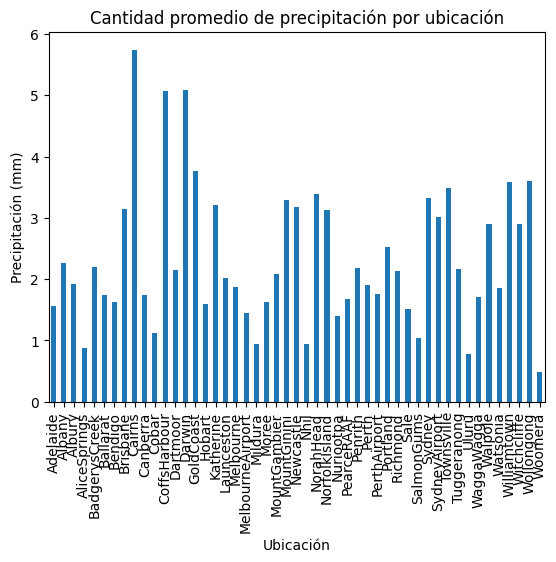

In [15]:
#La localidad de "Cairns" posee un promedio de precipitación mas alta que
#el resto, llegando a los 5,7mm.

precipitation_by_location = df.groupby('Location')['Rainfall'].mean()
precipitation_by_location.plot(kind='bar')
plt.title('Cantidad promedio de precipitación por ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Precipitación (mm)')
plt.show()


In [16]:
#Listado de locaciones con el promedio de precipitaciones, ordenadas desde
#el mas alto al mas bajo.
avg = df.groupby('Location')['Rainfall'].mean()
avg.sort_values(ascending=False)

Location
Cairns              5.742035
Darwin              5.092452
CoffsHarbour        5.061497
GoldCoast           3.769396
Wollongong          3.594903
Williamtown         3.591108
Townsville          3.485592
NorahHead           3.387299
Sydney              3.324543
MountGinini         3.292260
Katherine           3.201090
Newcastle           3.183892
Brisbane            3.144891
NorfolkIsland       3.127665
SydneyAirport       3.009917
Walpole             2.906846
Witchcliffe         2.895664
Portland            2.530374
Albany              2.263859
BadgerysCreek       2.193101
Penrith             2.175304
Tuggeranong         2.164043
Dartmoor            2.146567
Richmond            2.138462
MountGambier        2.087562
Launceston          2.011988
Albury              1.914115
Perth               1.906295
Melbourne           1.870062
Watsonia            1.860820
PerthAirport        1.761648
Canberra            1.741720
Ballarat            1.740026
WaggaWagga          1.709946
Pearc

### Pregunta 2: ¿Cuál es la probabilidad que llueva mas de 1mm el día de mañana?

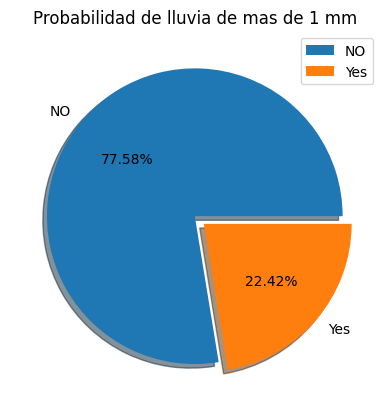

In [17]:
#La probabilidad de que llueva el día de mañana en las localidades es de un 
#22.42%. Mientras que la probabilidad de que no llueva es de un 77.58%. 
#Por lo tanto lo mas probable es que no llueva mañana.
x = df['RainTomorrow'].value_counts(normalize=True)
plt.pie(x,autopct = "%1.2f%%",labels =['NO','Yes'],shadow = True, explode = [0, 0.08])
plt.legend(['NO','Yes']);
plt.title('Probabilidad de lluvia de mas de 1 mm');

### Pregunta 3: ¿Cuál es el máximo en mm de lluvias caídas por ubicación?

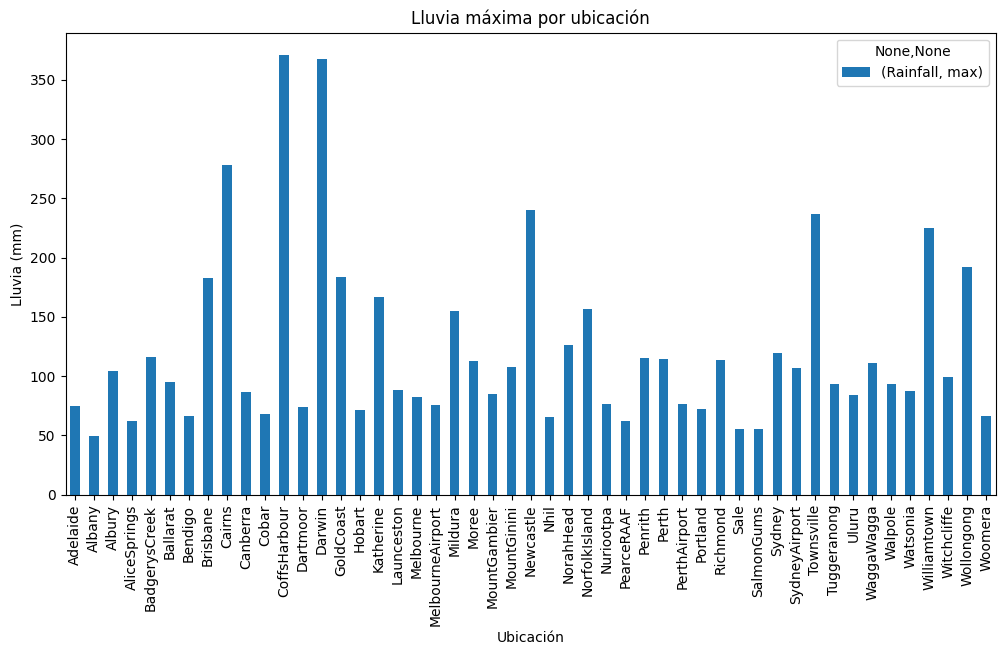

In [18]:
# Agrupamos los datos por ubicación para calcular la lluvia maxima caida en 
# las localidades, asi sabemos donde llueve mas
group_rain = df.groupby('Location').agg({'Rainfall':['max']})

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Crear los gráficos de barras 
group_rain.plot(kind='bar', ax=ax)

# Añadir título y etiquetas a los ejes
ax.set_title('Lluvia máxima por ubicación')
ax.set_xlabel('Ubicación')
ax.set_ylabel('Lluvia (mm)')
# Mostrar el gráfico
plt.show()

In [19]:
#Devuelve la ubicación en la que se registró la mayor cantidad de lluvia 
#en la columna 'Rainfall' del DataFrame 'df'.
Rainfall = df.loc[df['Rainfall'].idxmax(), 'Location']
mm = df['Rainfall'].max()
Rainfall
mm
print(f"La localidad de '{Rainfall}' posee un maximo de '{mm}'mm caidos")

La localidad de 'CoffsHarbour' posee un maximo de '371.0'mm caidos


In [20]:
#Listado de localidades, ordenadas desde la que tuvo mayor lluvia, hasta
#la que tiene menor cantidad de lluvia. 
RainfallMax = df.groupby('Location')['Rainfall'].max()
RainfallMax.sort_values(ascending=False)

Location
CoffsHarbour        371.0
Darwin              367.6
Cairns              278.4
Newcastle           240.0
Townsville          236.8
Williamtown         225.0
Wollongong          192.0
GoldCoast           183.4
Brisbane            182.6
Katherine           167.0
NorfolkIsland       156.8
Mildura             155.0
NorahHead           126.4
Sydney              119.4
BadgerysCreek       116.0
Penrith             115.4
Perth               114.4
Richmond            113.4
Moree               113.0
WaggaWagga          110.8
MountGinini         107.6
SydneyAirport       106.8
Albury              104.2
Witchcliffe          99.4
Ballarat             95.0
Walpole              93.2
Tuggeranong          93.0
Launceston           88.0
Watsonia             87.4
Canberra             87.0
MountGambier         84.6
Uluru                83.8
Melbourne            82.2
Nuriootpa            76.6
PerthAirport         76.6
MelbourneAirport     75.8
Adelaide             75.2
Dartmoor             73.6
Por

### Pregunta 4: ¿Cuál es la ubicación con la temperatura máxima registrada?

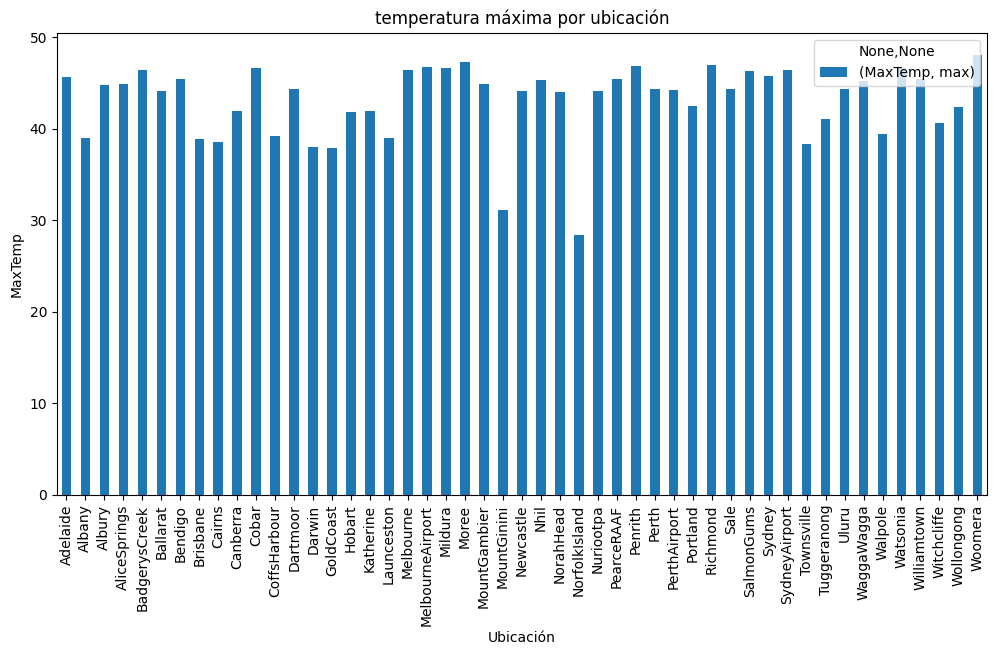

In [21]:
# Agrupamos los datos por ubicación para calcular la temperatura maxima 
# en las localidades.
group_rain = df.groupby('Location').agg({'MaxTemp':['max']})

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Crear los gráficos de barras 
group_rain.plot(kind='bar', ax=ax)

# Añadir título y etiquetas a los ejes
ax.set_title('temperatura máxima por ubicación')
ax.set_xlabel('Ubicación')
ax.set_ylabel('MaxTemp')
# Mostrar el gráfico
plt.show()

In [22]:
#devuelve la ubicación en la que se registró la temperatura máxima 
#en la columna 'MaxTemp' del DataFrame 'df'.
MaxTemp = df.loc[df['MaxTemp'].idxmax(), 'Location']
Temp = df['MaxTemp'].max()
MaxTemp
Temp
print(f"La localidad de '{MaxTemp}' con una temperatura maxima de '{Temp}'")

La localidad de 'Woomera' con una temperatura maxima de '48.1'


In [23]:
#Listado de localidades, ordenadas desde la que tuvo la mayor temperatura,
#a la que tuvo menor temperatura.
MaxTemp = df.groupby('Location')['MaxTemp'].max()
MaxTemp.sort_values(ascending=False)

Location
Woomera             48.1
Moree               47.3
Richmond            47.0
Penrith             46.9
MelbourneAirport    46.8
Watsonia            46.7
Mildura             46.7
Cobar               46.6
Melbourne           46.4
SydneyAirport       46.4
BadgerysCreek       46.4
SalmonGums          46.3
Sydney              45.8
Adelaide            45.7
Williamtown         45.5
PearceRAAF          45.4
Bendigo             45.4
Nhil                45.3
WaggaWagga          45.2
AliceSprings        44.9
MountGambier        44.9
Albury              44.8
Perth               44.4
Dartmoor            44.4
Uluru               44.4
Sale                44.4
PerthAirport        44.2
Ballarat            44.1
Newcastle           44.1
Nuriootpa           44.1
NorahHead           44.0
Portland            42.5
Wollongong          42.4
Canberra            42.0
Katherine           42.0
Hobart              41.8
Tuggeranong         41.1
Witchcliffe         40.6
Walpole             39.4
CoffsHarbour    

### Pregunta 5: ¿Cuál es la ubicación con la temperatura mínima registrada?

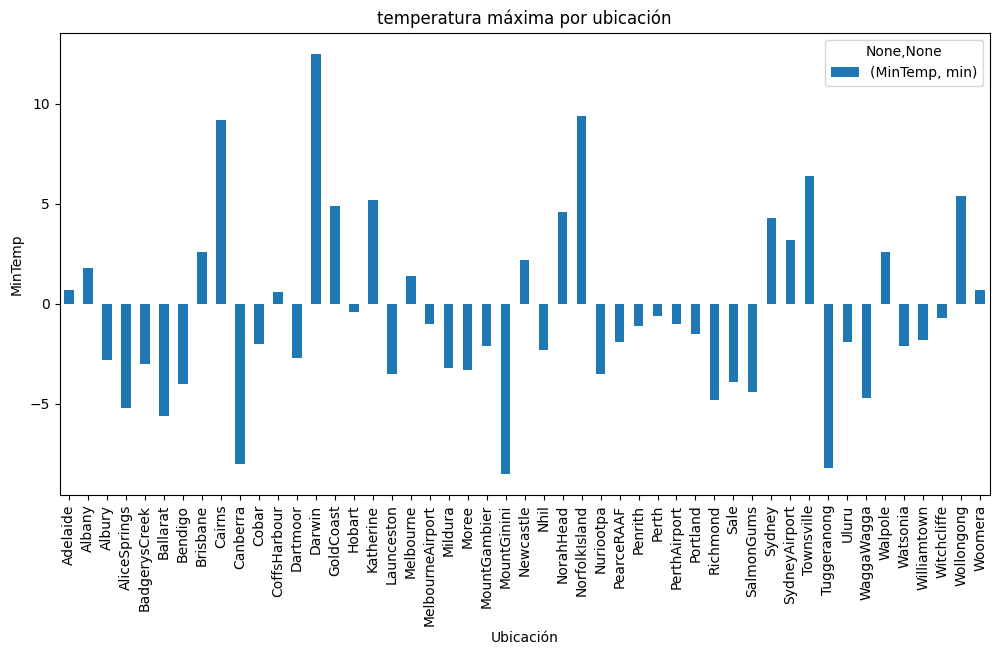

In [24]:
# Agrupamos los datos por ubicación para calcular la temperatura minima en 
# las localidades.
group_rain = df.groupby('Location').agg({'MinTemp':['min']})

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6 ))

# Crear los gráficos de barras 
group_rain.plot(kind='bar', ax=ax)

# Añadir título y etiquetas a los ejes
ax.set_title('temperatura máxima por ubicación')
ax.set_xlabel('Ubicación')
ax.set_ylabel('MinTemp')
# Mostrar el gráfico
plt.show()

In [25]:
#Devuelve la ubicación en la que se registró la temperatura mínima en la columna 'MinTemp' 
#del DataFrame 'df'.
MinTemp = df.loc[df['MinTemp'].idxmin(), 'Location']
Temp = df['MinTemp'].min()
MinTemp
Temp
print(f"La localidad de {MinTemp} con una temperatura minima de {Temp}")

La localidad de MountGinini con una temperatura minima de -8.5


In [26]:
#Listado de localidades, ordenadas desde la que tuvo la menor temperatura,
#a la que tuvo mayor temperatura.
MinTemp = df.groupby('Location')['MinTemp'].min()
MinTemp.sort_values(ascending=True)

Location
MountGinini         -8.5
Tuggeranong         -8.2
Canberra            -8.0
Ballarat            -5.6
AliceSprings        -5.2
Richmond            -4.8
WaggaWagga          -4.7
SalmonGums          -4.4
Bendigo             -4.0
Sale                -3.9
Launceston          -3.5
Nuriootpa           -3.5
Moree               -3.3
Mildura             -3.2
BadgerysCreek       -3.0
Albury              -2.8
Dartmoor            -2.7
Nhil                -2.3
Watsonia            -2.1
MountGambier        -2.1
Cobar               -2.0
Uluru               -1.9
PearceRAAF          -1.9
Williamtown         -1.8
Portland            -1.5
Penrith             -1.1
PerthAirport        -1.0
MelbourneAirport    -1.0
Witchcliffe         -0.7
Perth               -0.6
Hobart              -0.4
CoffsHarbour         0.6
Adelaide             0.7
Woomera              0.7
Melbourne            1.4
Albany               1.8
Newcastle            2.2
Walpole              2.6
Brisbane             2.6
SydneyAirport   

## Cambio de nombres de columnas de ingles a español 

Realizamos el cambio de nombres de todas las columnas para poder tener un mejor entendimiento de los datos.

In [27]:
# Crear un diccionario con los nuevos nombres de columnas
nuevos_nombres = {'Date': 'Fecha','Location': 'Localidad', 'MinTemp': 'TemperaturaMinima', 'MaxTemp': 'TemperaturaMaxima' , 'Rainfall': 'Precipitacion','Evaporation':'Evaporacion','Sunshine':'Horas_sol_brillante','WindGustDir': 'DirRafagaViento','WindGustSpeed': 'VelocidadRafagaViento','WindDir9am':'DirViento9am','WindDir3pm':'DirViento3pm','WindSpeed9am':'VelViento9am','WindSpeed3pm':'VelViento3pm','Humidity9am':'Humedad9am','Humidity3pm':'Humedad3pm','Pressure9am':'PresionAire9am','Pressure3pm':'PresionAire3pm','Cloud9am':'Nubosidad9am','Cloud3pm':'Nubosidad3pm','Temp9am':'Temperatura9am','Temp3pm':'Temperatura3pm','RainToday':'Llueve_Hoy','RainTomorrow':'Llueve_Mañana'}

# Cambiar los nombres de las columnas usando el método rename() de pandas
df = df.rename(columns=nuevos_nombres)

# Imprimir el DataFrame con los nuevos nombres de columnas
print(list(df.columns))

['Fecha', 'Localidad', 'TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion', 'Evaporacion', 'Horas_sol_brillante', 'DirRafagaViento', 'VelocidadRafagaViento', 'DirViento9am', 'DirViento3pm', 'VelViento9am', 'VelViento3pm', 'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm', 'Nubosidad9am', 'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm', 'Llueve_Hoy', 'Llueve_Mañana']


Podemos visualizar los cambios realizados anteriormente con los cambios de nombre de todas las columnas del dataframe que hemos filtrado.

In [28]:
df.columns.to_list()

['Fecha',
 'Localidad',
 'TemperaturaMinima',
 'TemperaturaMaxima',
 'Precipitacion',
 'Evaporacion',
 'Horas_sol_brillante',
 'DirRafagaViento',
 'VelocidadRafagaViento',
 'DirViento9am',
 'DirViento3pm',
 'VelViento9am',
 'VelViento3pm',
 'Humedad9am',
 'Humedad3pm',
 'PresionAire9am',
 'PresionAire3pm',
 'Nubosidad9am',
 'Nubosidad3pm',
 'Temperatura9am',
 'Temperatura3pm',
 'Llueve_Hoy',
 'Llueve_Mañana']

# Matriz del Dataset weatherAUS  

### Aquí visualizamos los distintos registros para poder verificar que tipos de datos trataremos, además de entender el contexto de los campos 

Primeros 5 registros:

In [29]:
#Visualización primeros 5 registros de nuestro dataframe filtrado.
df.head()

Fecha Localidad  TemperaturaMinima  TemperaturaMaxima  Precipitacion  \
0  2008-12-01    Albury               13.4               22.9            0.6   
1  2008-12-02    Albury                7.4               25.1            0.0   
2  2008-12-03    Albury               12.9               25.7            0.0   
3  2008-12-04    Albury                9.2               28.0            0.0   
4  2008-12-05    Albury               17.5               32.3            1.0   

   Evaporacion  Horas_sol_brillante DirRafagaViento  VelocidadRafagaViento  \
0          NaN                  NaN               W                   44.0   
1          NaN                  NaN             WNW                   44.0   
2          NaN                  NaN             WSW                   46.0   
3          NaN                  NaN              NE                   24.0   
4          NaN                  NaN               W                   41.0   

  DirViento9am  ... Humedad9am  Humedad3pm  PresionAire9am  PresionAire3pm  \
0            W  ...       71.0        22.0          1007.7          1007.1   
1          NNW  ...       44.0        25.0          1010.6          1007.8   
2            W  ...       38.0        30.0          1007.6          1008.7   
3           SE  ...       45.0        16.0          1017.6          1012.8   
4          ENE  ...       82.0        33.0          1010.8          1006.0   

   Nubosidad9am  Nubosidad3pm  Temperatura9am  Temperatura3pm  Llueve_Hoy  \
0           8.0           NaN            16.9            21.8          No   
1           NaN           NaN            17.2            24.3          No   
2           NaN           2.0            21.0            23.2          No   
3           NaN           NaN            18.1            26.5          No   
4           7.0           8.0            17.8            29.7          No   

   Llueve_Mañana  
0             No  
1             No  
2             No  
3             No  
4             No  

[5 rows x 23 columns]

#Visualización primeros 5 registros de nuestro dataframe filtrado.
df_filtrado.head()

In [30]:
#Visualización últimos 5 datos de nuestro dataframe filtrado.
df.tail()

Fecha Localidad  TemperaturaMinima  TemperaturaMaxima  \
145455  2017-06-21     Uluru                2.8               23.4   
145456  2017-06-22     Uluru                3.6               25.3   
145457  2017-06-23     Uluru                5.4               26.9   
145458  2017-06-24     Uluru                7.8               27.0   
145459  2017-06-25     Uluru               14.9                NaN   

        Precipitacion  Evaporacion  Horas_sol_brillante DirRafagaViento  \
145455            0.0          NaN                  NaN               E   
145456            0.0          NaN                  NaN             NNW   
145457            0.0          NaN                  NaN               N   
145458            0.0          NaN                  NaN              SE   
145459            0.0          NaN                  NaN             NaN   

        VelocidadRafagaViento DirViento9am  ... Humedad9am  Humedad3pm  \
145455                   31.0           SE  ...       51.0        24.0   
145456                   22.0           SE  ...       56.0        21.0   
145457                   37.0           SE  ...       53.0        24.0   
145458                   28.0          SSE  ...       51.0        24.0   
145459                    NaN          ESE  ...       62.0        36.0   

        PresionAire9am  PresionAire3pm  Nubosidad9am  Nubosidad3pm  \
145455          1024.6          1020.3           NaN           NaN   
145456          1023.5          1019.1           NaN           NaN   
145457          1021.0          1016.8           NaN           NaN   
145458          1019.4          1016.5           3.0           2.0   
145459          1020.2          1017.9           8.0           8.0   

        Temperatura9am  Temperatura3pm  Llueve_Hoy  Llueve_Mañana  
145455            10.1            22.4          No             No  
145456            10.9            24.5          No             No  
145457            12.5            26.1          No             No  
145458            15.1            26.0          No             No  
145459            15.0            20.9          No            NaN  

[5 rows x 23 columns]

## Visualización de las columnas con las filas aleatoriamente

In [31]:
#Visualizamos algunas lineas de manera aleatoria
df.sample(5)

Fecha         Localidad  TemperaturaMinima  TemperaturaMaxima  \
65701  2013-05-19  MelbourneAirport                6.6               16.9   
19996  2014-05-30         NorahHead               15.1               19.2   
54542  2015-12-14       MountGinini                7.7               21.7   
49898  2011-05-25       Tuggeranong                5.3               12.4   
65210  2011-11-16  MelbourneAirport               12.9               18.9   

       Precipitacion  Evaporacion  Horas_sol_brillante DirRafagaViento  \
65701            0.8          1.0                  8.1               N   
19996           12.2          NaN                  NaN              SE   
54542            0.0          NaN                  NaN              SW   
49898            0.0          NaN                  NaN               S   
65210           10.0          6.6                 11.5             SSE   

       VelocidadRafagaViento DirViento9am  ... Humedad9am  Humedad3pm  \
65701                   46.0          WNW  ...       75.0        41.0   
19996                   43.0            W  ...       92.0        83.0   
54542                   39.0          SSW  ...       33.0        24.0   
49898                   52.0          SSE  ...       62.0        54.0   
65210                   37.0            S  ...       66.0        39.0   

       PresionAire9am  PresionAire3pm  Nubosidad9am  Nubosidad3pm  \
65701          1019.4          1016.7           1.0           5.0   
19996          1026.7          1024.6           NaN           NaN   
54542             NaN             NaN           NaN           NaN   
49898          1015.9          1014.4           NaN           NaN   
65210          1019.7          1019.7           7.0           1.0   

       Temperatura9am  Temperatura3pm  Llueve_Hoy  Llueve_Mañana  
65701            11.3            16.2          No             No  
19996            15.4            18.6         Yes            Yes  
54542            14.2            20.4          No             No  
49898             7.6            11.6          No             No  
65210            15.5            18.3         Yes             No  

[5 rows x 23 columns]

# Cantidad de filas y columnas

Para el Dataframe filtrado por "LluviaMañana" == 1 encontramos 31.877 filas y 23 columnas, los cuales se pueden observar en el siguiente código

In [32]:
#Muestra total de filas y columnas de nuestro dataframe filtrado
df.shape

(145460, 23)

# Conteo de Campos no nulos

La cantidad total de nulos que posee nuestro dataframe filtrado, en cada una de las columnas.

In [33]:
# Revisamos la cantidad de datos por columna
df.count().astype(str) + ' registros con datos'

Fecha                    145460 registros con datos
Localidad                145460 registros con datos
TemperaturaMinima        143975 registros con datos
TemperaturaMaxima        144199 registros con datos
Precipitacion            142199 registros con datos
Evaporacion               82670 registros con datos
Horas_sol_brillante       75625 registros con datos
DirRafagaViento          135134 registros con datos
VelocidadRafagaViento    135197 registros con datos
DirViento9am             134894 registros con datos
DirViento3pm             141232 registros con datos
VelViento9am             143693 registros con datos
VelViento3pm             142398 registros con datos
Humedad9am               142806 registros con datos
Humedad3pm               140953 registros con datos
PresionAire9am           130395 registros con datos
PresionAire3pm           130432 registros con datos
Nubosidad9am              89572 registros con datos
Nubosidad3pm              86102 registros con datos
Temperatura9

# Revisión de tipo de datos

Object = String o cadena de caracteres  ( cantidad de columnas = 4 )

float64 = numérico ( cantidad de columnas = 16 )

unit8 = Variable de matriz  ( cantidad de columnas = 4 )

int64 = Variable numérico (Cantidad de columnas = 3)

In [34]:
# Revisión de los tipos de datos
df.dtypes

Fecha                     object
Localidad                 object
TemperaturaMinima        float64
TemperaturaMaxima        float64
Precipitacion            float64
Evaporacion              float64
Horas_sol_brillante      float64
DirRafagaViento           object
VelocidadRafagaViento    float64
DirViento9am              object
DirViento3pm              object
VelViento9am             float64
VelViento3pm             float64
Humedad9am               float64
Humedad3pm               float64
PresionAire9am           float64
PresionAire3pm           float64
Nubosidad9am             float64
Nubosidad3pm             float64
Temperatura9am           float64
Temperatura3pm           float64
Llueve_Hoy                object
Llueve_Mañana             object
dtype: object

# Tabla con datos estadísticos 

### Conteo, Media , Desv.Std , Mínimo , Máximo , ( cuartil 1,2,3)

Alguno de los datos que se pueden visualizar son : Promedio de Temperatura mínima en los lugares donde lloverá mañana en Australia es de 13.1°C , Temperatura Mínima Registrada es de -7.2°C y la Temperatura Máxima es de 30.7°C. además la desviación estándar de precipitación es de 14.3, significa que las cantidades de precipitación medidas en un lugar están dispersas alrededor de su cantidad promedio en una cantidad de aproximadamente 14.3 unidades, lo que indica que hay una cierta variabilidad en las precipitaciones medidas.

In [35]:
#Obtenemos las estadísticas de las columnas que solo tienen numeros
df.describe()

TemperaturaMinima  TemperaturaMaxima  Precipitacion   Evaporacion  \
count      143975.000000      144199.000000  142199.000000  82670.000000   
mean           12.194034          23.221348       2.360918      5.468232   
std             6.398495           7.119049       8.478060      4.193704   
min            -8.500000          -4.800000       0.000000      0.000000   
25%             7.600000          17.900000       0.000000      2.600000   
50%            12.000000          22.600000       0.000000      4.800000   
75%            16.900000          28.200000       0.800000      7.400000   
max            33.900000          48.100000     371.000000    145.000000   

       Horas_sol_brillante  VelocidadRafagaViento   VelViento9am  \
count         75625.000000          135197.000000  143693.000000   
mean              7.611178              40.035230      14.043426   
std               3.785483              13.607062       8.915375   
min               0.000000               6.000000       0.000000   
25%               4.800000              31.000000       7.000000   
50%               8.400000              39.000000      13.000000   
75%              10.600000              48.000000      19.000000   
max              14.500000             135.000000     130.000000   

        VelViento3pm     Humedad9am     Humedad3pm  PresionAire9am  \
count  142398.000000  142806.000000  140953.000000    130395.00000   
mean       18.662657      68.880831      51.539116      1017.64994   
std         8.809800      19.029164      20.795902         7.10653   
min         0.000000       0.000000       0.000000       980.50000   
25%        13.000000      57.000000      37.000000      1012.90000   
50%        19.000000      70.000000      52.000000      1017.60000   
75%        24.000000      83.000000      66.000000      1022.40000   
max        87.000000     100.000000     100.000000      1041.00000   

       PresionAire3pm  Nubosidad9am  Nubosidad3pm  Temperatura9am  \
count   130432.000000  89572.000000  86102.000000   143693.000000   
mean      1015.255889      4.447461      4.509930       16.990631   
std          7.037414      2.887159      2.720357        6.488753   
min        977.100000      0.000000      0.000000       -7.200000   
25%       1010.400000      1.000000      2.000000       12.300000   
50%       1015.200000      5.000000      5.000000       16.700000   
75%       1020.000000      7.000000      7.000000       21.600000   
max       1039.600000      9.000000      9.000000       40.200000   

       Temperatura3pm  
count    141851.00000  
mean         21.68339  
std           6.93665  
min          -5.40000  
25%          16.60000  
50%          21.10000  
75%          26.40000  
max          46.70000

# Descripción de: 

### Conteo de datos, valores únicos, más registrados y la frecuencia con que se repiten en variables categóricas

Podemos ver que en la columna Fecha tiene 31877 registros con 49 datos únicos, que la localidad de Portland es la que mas se repite. 

In [36]:
#Obtiene las estadisticas de todas las variables categoricas 
df.describe(include = ['object'])

Fecha Localidad DirRafagaViento DirViento9am DirViento3pm  \
count       145460    145460          135134       134894       141232   
unique        3436        49              16           16           16   
top     2017-01-21  Canberra               W            N           SE   
freq            49      3436            9915        11758        10838   

       Llueve_Hoy Llueve_Mañana  
count      142199        142193  
unique          2             2  
top            No            No  
freq       110319        110316

# Listado de todos los nombres de las columnas

In [37]:
#Se realiza una lista con la cantidad total de columnas
df.columns.tolist()

['Fecha',
 'Localidad',
 'TemperaturaMinima',
 'TemperaturaMaxima',
 'Precipitacion',
 'Evaporacion',
 'Horas_sol_brillante',
 'DirRafagaViento',
 'VelocidadRafagaViento',
 'DirViento9am',
 'DirViento3pm',
 'VelViento9am',
 'VelViento3pm',
 'Humedad9am',
 'Humedad3pm',
 'PresionAire9am',
 'PresionAire3pm',
 'Nubosidad9am',
 'Nubosidad3pm',
 'Temperatura9am',
 'Temperatura3pm',
 'Llueve_Hoy',
 'Llueve_Mañana']

# Conteo de nulos por columna

Observación de las 4 columnas con mas valores nulos:

Horas sol brillante = 15056 nulos
Nubosidad 3pm = 11589 nulos
Nubosidad 9am = 11255 nulos
Evaporación = 14018 nulos

In [38]:
# Muestra los valores nulos de todas las columnas usando un ciclo for
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de Fecha = 0
Total de valores nulos de Localidad = 0
Total de valores nulos de TemperaturaMinima = 1485
Total de valores nulos de TemperaturaMaxima = 1261
Total de valores nulos de Precipitacion = 3261
Total de valores nulos de Evaporacion = 62790
Total de valores nulos de Horas_sol_brillante = 69835
Total de valores nulos de DirRafagaViento = 10326
Total de valores nulos de VelocidadRafagaViento = 10263
Total de valores nulos de DirViento9am = 10566
Total de valores nulos de DirViento3pm = 4228
Total de valores nulos de VelViento9am = 1767
Total de valores nulos de VelViento3pm = 3062
Total de valores nulos de Humedad9am = 2654
Total de valores nulos de Humedad3pm = 4507
Total de valores nulos de PresionAire9am = 15065
Total de valores nulos de PresionAire3pm = 15028
Total de valores nulos de Nubosidad9am = 55888
Total de valores nulos de Nubosidad3pm = 59358
Total de valores nulos de Temperatura9am = 1767
Total de valores nulos de Temperatura3pm = 3609
Total de

# Porcentajes nulos por columna

Las 4 columnas con mas porcentaje de valores nulos:

Horas sol brillante = 47.23 % 
Nubosidad 3pm = 36.36 %
Nubosidad 9am = 35.31 %
Evaporación = 43.98 %

In [39]:
round((df.isna().sum() / len(df)) * 100, 2).astype(str) + ' % nulos'

Fecha                      0.0 % nulos
Localidad                  0.0 % nulos
TemperaturaMinima         1.02 % nulos
TemperaturaMaxima         0.87 % nulos
Precipitacion             2.24 % nulos
Evaporacion              43.17 % nulos
Horas_sol_brillante      48.01 % nulos
DirRafagaViento            7.1 % nulos
VelocidadRafagaViento     7.06 % nulos
DirViento9am              7.26 % nulos
DirViento3pm              2.91 % nulos
VelViento9am              1.21 % nulos
VelViento3pm              2.11 % nulos
Humedad9am                1.82 % nulos
Humedad3pm                 3.1 % nulos
PresionAire9am           10.36 % nulos
PresionAire3pm           10.33 % nulos
Nubosidad9am             38.42 % nulos
Nubosidad3pm             40.81 % nulos
Temperatura9am            1.21 % nulos
Temperatura3pm            2.48 % nulos
Llueve_Hoy                2.24 % nulos
Llueve_Mañana             2.25 % nulos
dtype: object

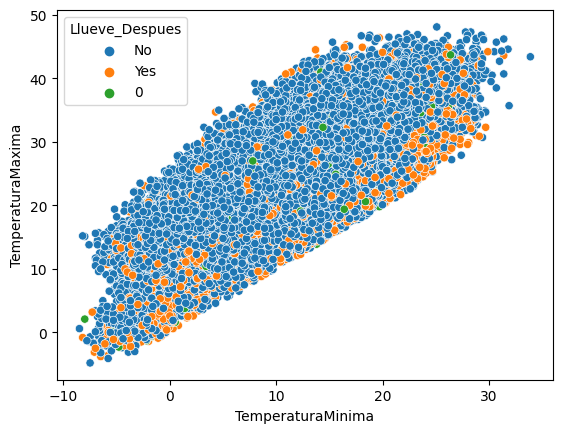

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una nueva columna indicando si llovió al día siguiente o no
df['Llueve_Despues'] = df['Llueve_Mañana'].shift(-1).fillna(0)

# Creamos el gráfico de dispersión
sns.scatterplot(x='TemperaturaMinima', y='TemperaturaMaxima', hue='Llueve_Despues', data=df)

# Mostramos el gráfico
plt.show()

## Pregunta 1: ¿Cuál es el promedio en mm de precipitaciones por ubicación?

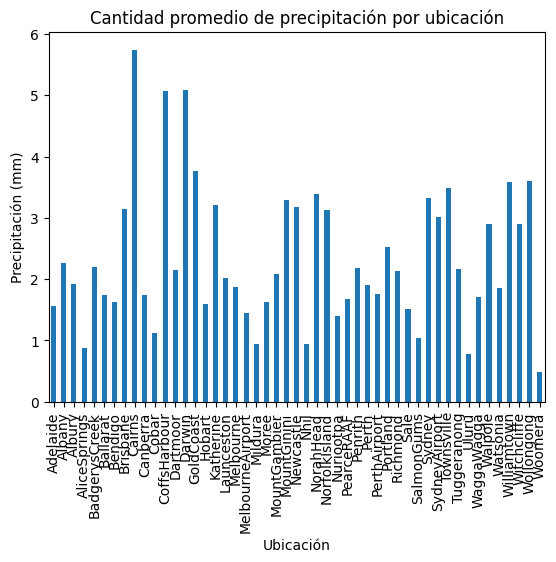

In [41]:
precipitacion_by_localidad = df.groupby('Localidad')['Precipitacion'].mean()
precipitacion_by_localidad.plot(kind='bar')
plt.title('Cantidad promedio de precipitación por ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Precipitación (mm)')
plt.show()

#Se puede observar en el grafico que la localidad que posee mayor promedio de precipitaciones
#es Townsville con promedio de 14.7 mm

Se puede observar en el grafico que la localidad que posee mayor promedio de precipitaciones es Townsville con promedio de 14.7 mm

In [42]:
#Corroboramos la informacion con un listado de locaciones con el promedio de precipitaciones, 
#ordenadas desde el mas alto al mas bajo.
avg = df.groupby('Localidad')['Precipitacion'].mean()
avg.sort_values(ascending=False)

Localidad
Cairns              5.742035
Darwin              5.092452
CoffsHarbour        5.061497
GoldCoast           3.769396
Wollongong          3.594903
Williamtown         3.591108
Townsville          3.485592
NorahHead           3.387299
Sydney              3.324543
MountGinini         3.292260
Katherine           3.201090
Newcastle           3.183892
Brisbane            3.144891
NorfolkIsland       3.127665
SydneyAirport       3.009917
Walpole             2.906846
Witchcliffe         2.895664
Portland            2.530374
Albany              2.263859
BadgerysCreek       2.193101
Penrith             2.175304
Tuggeranong         2.164043
Dartmoor            2.146567
Richmond            2.138462
MountGambier        2.087562
Launceston          2.011988
Albury              1.914115
Perth               1.906295
Melbourne           1.870062
Watsonia            1.860820
PerthAirport        1.761648
Canberra            1.741720
Ballarat            1.740026
WaggaWagga          1.709946
Pear

## Pregunta 2: ¿Cuál es el máximo en mm de lluvias caídas por ubicación?

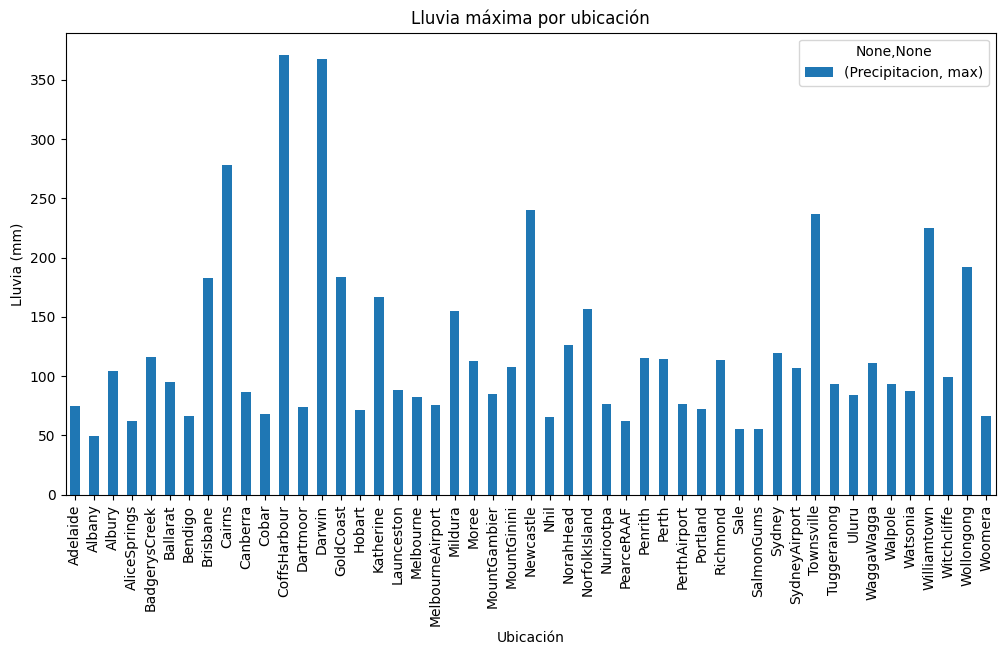

In [43]:
# Agrupamos los datos por ubicación para calcular la lluvia maxima caida en 
# las localidades, asi sabemos donde llueve mas
group_rain = df.groupby('Localidad').agg({'Precipitacion':['max']})

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Crear los gráficos de barras 
group_rain.plot(kind='bar', ax=ax)

# Añadir título y etiquetas a los ejes
ax.set_title('Lluvia máxima por ubicación')
ax.set_xlabel('Ubicación')
ax.set_ylabel('Lluvia (mm)')

# Mostrar el gráfico
plt.show()

Podemos viausliazar dentor del grafico que la localidad de "CoffsHarbour" pose la mayor cantidad de lluvia caida.

In [44]:
#Devuelve la ubicación en la que se registró la mayor cantidad de lluvia 
#en la columna 'Precipitacion' del DataFrame 'df_filtrado'.
Precipitacion = df.loc[df['Precipitacion'].idxmax(), 'Localidad']
mm = df['Precipitacion'].max()
Precipitacion
mm
print(f"La localidad de '{Precipitacion}' posee un maximo de '{mm}'mm de lluvia caida")

La localidad de 'CoffsHarbour' posee un maximo de '371.0'mm de lluvia caida


En este código, podemos verificar que la localidad dentro del grafico es la que posee la mayor cantidad de lluvia caida registrada.

In [45]:
#Listado de localidades, ordenadas desde la que tuvo mayor lluvia, hasta
#la que tiene menor cantidad de lluvia. 
PrecipitacionMaxima = df.groupby('Localidad')['Precipitacion'].max()
PrecipitacionMaxima.sort_values(ascending=False)

Localidad
CoffsHarbour        371.0
Darwin              367.6
Cairns              278.4
Newcastle           240.0
Townsville          236.8
Williamtown         225.0
Wollongong          192.0
GoldCoast           183.4
Brisbane            182.6
Katherine           167.0
NorfolkIsland       156.8
Mildura             155.0
NorahHead           126.4
Sydney              119.4
BadgerysCreek       116.0
Penrith             115.4
Perth               114.4
Richmond            113.4
Moree               113.0
WaggaWagga          110.8
MountGinini         107.6
SydneyAirport       106.8
Albury              104.2
Witchcliffe          99.4
Ballarat             95.0
Walpole              93.2
Tuggeranong          93.0
Launceston           88.0
Watsonia             87.4
Canberra             87.0
MountGambier         84.6
Uluru                83.8
Melbourne            82.2
Nuriootpa            76.6
PerthAirport         76.6
MelbourneAirport     75.8
Adelaide             75.2
Dartmoor             73.6
Po

## Pregunta 3: ¿Cuál es la ubicación con la temperatura máxima registrada?

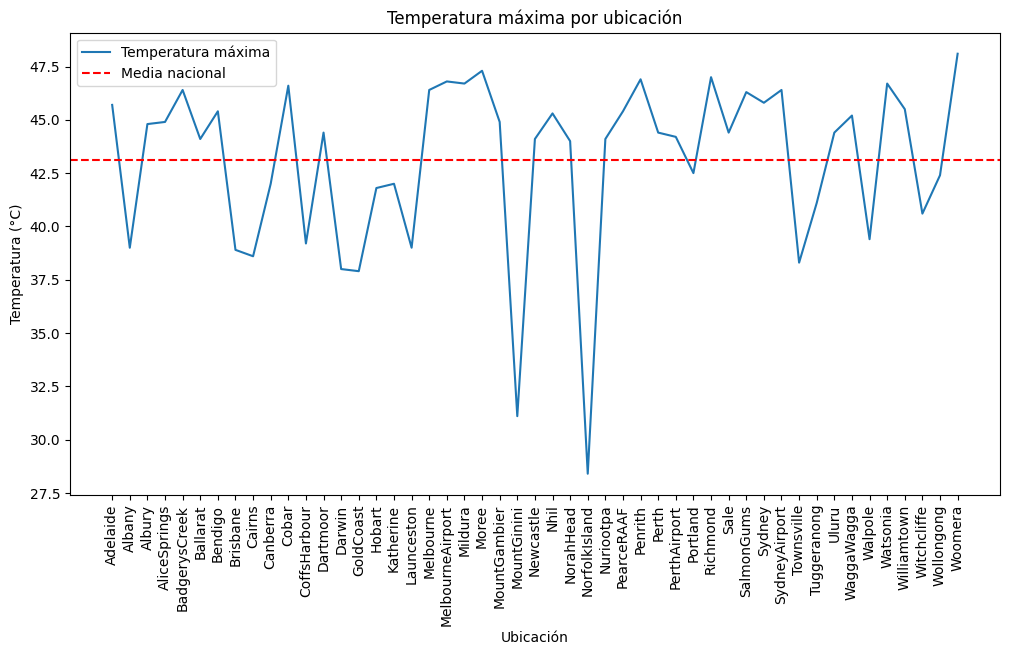

In [46]:
# Agrupamos los datos por ubicación para calcular la temperatura máxima y media en las localidades.
group_temp = df.groupby('Localidad').agg({'TemperaturaMaxima':['max', 'mean']})

# Creación de la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Creación de los gráficos de línea
ax.plot(group_temp['TemperaturaMaxima']['max'], label='Temperatura máxima')

# Añadimos los título y etiquetas a los ejes
ax.set_title('Temperatura máxima por ubicación')
ax.set_xlabel('Ubicación')
ax.set_ylabel('Temperatura (°C)')

# Añadimos línea de la media
mean_temp = group_temp['TemperaturaMaxima']['max'].mean()
ax.axhline(y=mean_temp, color='r', linestyle='--', label='Media nacional')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()


Dentro del grafico podemos visualizar que la localidad de "MelbourneAirport" posee la máxima temperatura registrada.

In [47]:
#devuelve la ubicación en la que se registró la temperatura máxima 
#en la columna 'TemperaturaMaxima' del DataFrame 'df'.
TemperaturaMaxima = df.loc[df['TemperaturaMaxima'].idxmax(), 'Localidad']
Temperatura = df['TemperaturaMaxima'].max()
TemperaturaMaxima
Temperatura
print(f"La localidad de '{TemperaturaMaxima}' con una temperatura maxima de '{Temperatura}'")

La localidad de 'Woomera' con una temperatura maxima de '48.1'


In [48]:
#devuelve El año  en la que se registró la temperatura máxima 
#en la columna 'MaxTemp' del DataFrame 'df'.
TemperaturaMaximaXAnio = df.loc[df['TemperaturaMaxima'].idxmax(), 'Fecha']
Temperatura = df['TemperaturaMaxima'].max()

print(f"El Año mas caluroso fue el '{TemperaturaMaximaXAnio}' fue con una temperatura maxima de '{Temperatura}'")

El Año mas caluroso fue el '2011-01-25' fue con una temperatura maxima de '48.1'


In [49]:
#Listado de localidades, ordenadas desde la que tuvo la mayor temperatura,
#a la que tuvo menor temperatura.
TemperaturaMaxima = df.groupby('Localidad')['TemperaturaMaxima'].max()
TemperaturaMaxima.sort_values(ascending=False)

Localidad
Woomera             48.1
Moree               47.3
Richmond            47.0
Penrith             46.9
MelbourneAirport    46.8
Watsonia            46.7
Mildura             46.7
Cobar               46.6
Melbourne           46.4
SydneyAirport       46.4
BadgerysCreek       46.4
SalmonGums          46.3
Sydney              45.8
Adelaide            45.7
Williamtown         45.5
PearceRAAF          45.4
Bendigo             45.4
Nhil                45.3
WaggaWagga          45.2
AliceSprings        44.9
MountGambier        44.9
Albury              44.8
Perth               44.4
Dartmoor            44.4
Uluru               44.4
Sale                44.4
PerthAirport        44.2
Ballarat            44.1
Newcastle           44.1
Nuriootpa           44.1
NorahHead           44.0
Portland            42.5
Wollongong          42.4
Canberra            42.0
Katherine           42.0
Hobart              41.8
Tuggeranong         41.1
Witchcliffe         40.6
Walpole             39.4
CoffsHarbour   

## Pregunta 4: ¿Cuál es la ubicación con la temperatura mínima registrada?

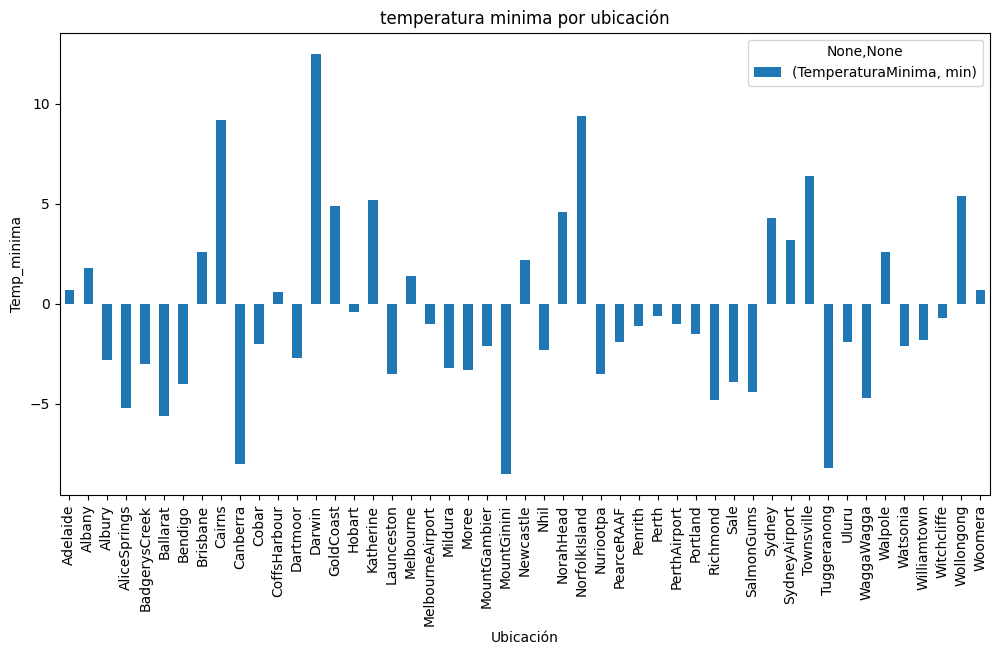

In [50]:
# Agrupamos los datos por ubicación para calcular la temperatura minima en 
# las localidades.
group_rain = df.groupby('Localidad').agg({'TemperaturaMinima':['min']})

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6 ))

# Crear los gráficos de barras 
group_rain.plot(kind='bar', ax=ax)

# Añadir título y etiquetas a los ejes
ax.set_title('temperatura minima por ubicación')
ax.set_xlabel('Ubicación')
ax.set_ylabel('Temp_minima')
# Mostrar el gráfico
plt.show()

In [51]:
#Devuelve la ubicación en la que se registró la temperatura mínima en la columna 'MinTemp' 
#del DataFrame 'df'.
Temp_minima = df.loc[df['TemperaturaMinima'].idxmin(), 'Localidad']
Temperatura = df['TemperaturaMinima'].min()
Temp_minima
Temperatura
print(f"La localidad de {Temp_minima} con una temperatura minima de {Temperatura} grados")

La localidad de MountGinini con una temperatura minima de -8.5 grados


Con este codigo podemos corroborar la informacion entregada por el grafico.

In [52]:
#Listado de localidades, ordenadas desde la que tuvo la menor temperatura,
#a la que tuvo mayor temperatura.
Temp_minima = df.groupby('Localidad')['TemperaturaMinima'].min()
Temp_minima.sort_values(ascending=True)

Localidad
MountGinini         -8.5
Tuggeranong         -8.2
Canberra            -8.0
Ballarat            -5.6
AliceSprings        -5.2
Richmond            -4.8
WaggaWagga          -4.7
SalmonGums          -4.4
Bendigo             -4.0
Sale                -3.9
Launceston          -3.5
Nuriootpa           -3.5
Moree               -3.3
Mildura             -3.2
BadgerysCreek       -3.0
Albury              -2.8
Dartmoor            -2.7
Nhil                -2.3
Watsonia            -2.1
MountGambier        -2.1
Cobar               -2.0
Uluru               -1.9
PearceRAAF          -1.9
Williamtown         -1.8
Portland            -1.5
Penrith             -1.1
PerthAirport        -1.0
MelbourneAirport    -1.0
Witchcliffe         -0.7
Perth               -0.6
Hobart              -0.4
CoffsHarbour         0.6
Adelaide             0.7
Woomera              0.7
Melbourne            1.4
Albany               1.8
Newcastle            2.2
Walpole              2.6
Brisbane             2.6
SydneyAirport  

## ¿Cuál es la temperatura promedio máxima y mínima registrada en, ni Australia?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


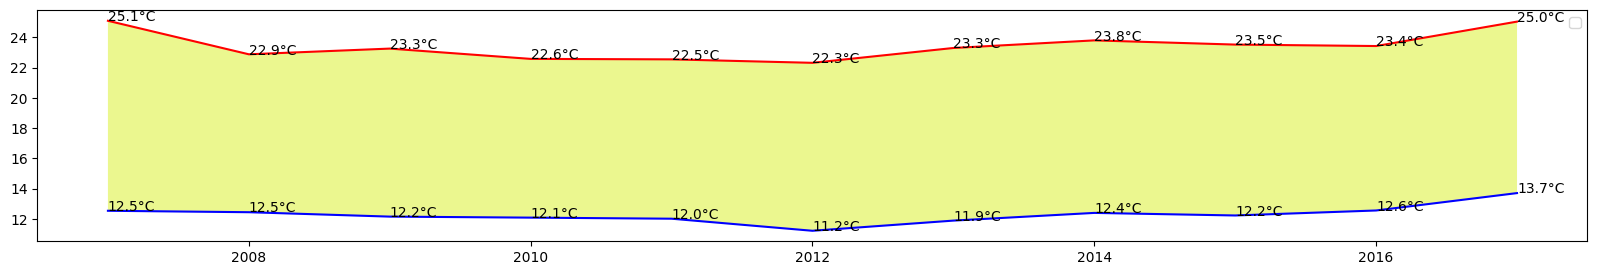

In [53]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d')

# Group the data by year and compute the mean temperature for each year
df_yearly = df.groupby(df['Fecha'].dt.year).mean()

# Create a new figure with a size of 20x3
plt.figure(figsize=[20, 3])

# Plot the minimum and maximum temperatures for each year
plt.plot(df_yearly.index, df_yearly['TemperaturaMinima'], color='blue')
plt.plot(df_yearly.index, df_yearly['TemperaturaMaxima'], color='red')

# Fill the area between the minimum and maximum temperatures with a yellow color
plt.fill_between(df_yearly.index, df_yearly['TemperaturaMinima'], df_yearly['TemperaturaMaxima'], facecolor='#EBF78F')

# Add a legend to the plot
plt.legend()

# Add text to the plot indicating the minimum and maximum temperatures for each year
for year in df_yearly.index:
    temp_min = df_yearly.loc[year, 'TemperaturaMinima']
    temp_max = df_yearly.loc[year, 'TemperaturaMaxima']
    plt.text(year, temp_min, f"{temp_min:.1f}°C")
    plt.text(year, temp_max, f"{temp_max:.1f}°C")

# Display the plot
plt.show()

Dentro de este grafico podemos visualizar que las temperaturas máximas y mínimas registradas dentro de las localidades no han variado tanto a través de los años transcurridos.

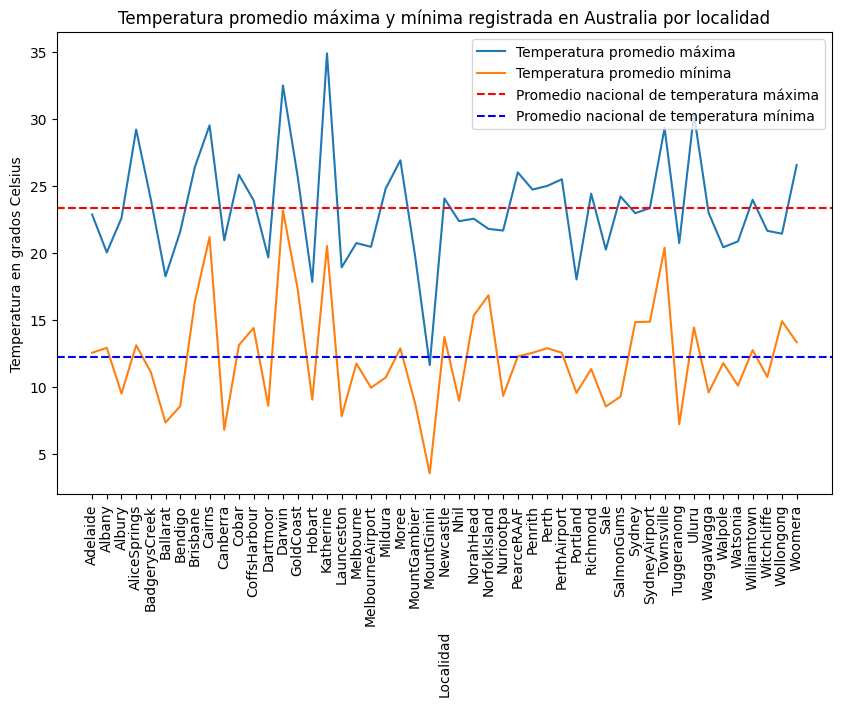

In [54]:
# Agrupar por Location y calcular la temperatura promedio máxima y mínima
temp_avg = df.groupby("Localidad").agg({"TemperaturaMaxima": "mean", "TemperaturaMinima": "mean"})

# Calcular la temperatura promedio máxima y mínima a nivel nacional
national_avg = temp_avg.mean()

# Crear el gráfico de línea
fig, ax = plt.subplots(figsize=(10, 6))

# Línea para la temperatura promedio máxima
ax.plot(temp_avg["TemperaturaMaxima"], label="Temperatura promedio máxima")

# Línea para la temperatura promedio mínima
ax.plot(temp_avg["TemperaturaMinima"], label="Temperatura promedio mínima")

# Línea para la temperatura promedio máxima y mínima a nivel nacional
ax.axhline(y=national_avg["TemperaturaMaxima"], color="r", linestyle="--", label="Promedio nacional de temperatura máxima")
ax.axhline(y=national_avg["TemperaturaMinima"], color="b", linestyle="--", label="Promedio nacional de temperatura mínima")

# Configurar los ejes y el título
ax.set_ylabel("Temperatura en grados Celsius")
ax.set_xlabel("Localidad", rotation=90)
ax.set_title("Temperatura promedio máxima y mínima registrada en Australia por localidad")

# Mostrar la leyenda y el gráfico
ax.legend()
plt.xticks(rotation=90)
plt.show()

# CRISP- DM 3

Preparación de los datos: Se debe realizar una limpieza de los datos, incluyendo la eliminación de duplicados, la imputación de valores faltantes y la transformación de los datos para su uso en el modelado, además se deben seleccionar las variables relevantes y se pueden crear nuevas variables, como las tendencias climáticas o las variables de interación, si es necesario.

In [55]:
df.dtypes

Fecha                    datetime64[ns]
Localidad                        object
TemperaturaMinima               float64
TemperaturaMaxima               float64
Precipitacion                   float64
Evaporacion                     float64
Horas_sol_brillante             float64
DirRafagaViento                  object
VelocidadRafagaViento           float64
DirViento9am                     object
DirViento3pm                     object
VelViento9am                    float64
VelViento3pm                    float64
Humedad9am                      float64
Humedad3pm                      float64
PresionAire9am                  float64
PresionAire3pm                  float64
Nubosidad9am                    float64
Nubosidad3pm                    float64
Temperatura9am                  float64
Temperatura3pm                  float64
Llueve_Hoy                       object
Llueve_Mañana                    object
Llueve_Despues                   object
dtype: object

In [56]:
# Verifica el número total de valores nulos en el DataFrame
print(df.isnull().sum().sum())

343248


### Tratamiento de valores nulos

In [57]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Rellenar valores nulos con un valor específico (ejemplo: 0)
df.fillna(0, inplace=True)

In [58]:
# Muestra los valores nulos de todas las columnas usando un ciclo for
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de Fecha = 0
Total de valores nulos de Localidad = 0
Total de valores nulos de TemperaturaMinima = 0
Total de valores nulos de TemperaturaMaxima = 0
Total de valores nulos de Precipitacion = 0
Total de valores nulos de Evaporacion = 0
Total de valores nulos de Horas_sol_brillante = 0
Total de valores nulos de DirRafagaViento = 0
Total de valores nulos de VelocidadRafagaViento = 0
Total de valores nulos de DirViento9am = 0
Total de valores nulos de DirViento3pm = 0
Total de valores nulos de VelViento9am = 0
Total de valores nulos de VelViento3pm = 0
Total de valores nulos de Humedad9am = 0
Total de valores nulos de Humedad3pm = 0
Total de valores nulos de PresionAire9am = 0
Total de valores nulos de PresionAire3pm = 0
Total de valores nulos de Nubosidad9am = 0
Total de valores nulos de Nubosidad3pm = 0
Total de valores nulos de Temperatura9am = 0
Total de valores nulos de Temperatura3pm = 0
Total de valores nulos de Llueve_Hoy = 0
Total de valores nulos de Llueve_

### Eliminación de columnas no necesarias.

In [59]:
# Eliminar columnas no necesarias (ejemplo: Fecha y Localidad)
df.drop(['Nubosidad9am','Evaporacion'], axis=1, inplace=True)

### Reemplazar valores categóricos con números

In [60]:
# Reemplazar los valores de "Sí" por 1 y "No" por 0
df["Llueve_Hoy"] = df["Llueve_Hoy"].map({"Sí": 1, "No": 0})

In [61]:
df['Llueve_Hoy'] = df['Llueve_Hoy'].fillna('No')

In [62]:
# Reemplazar valores nulos de la columna 'Precipitacion' con el valor promedio
df['Precipitacion'].fillna(df['Precipitacion'].mean(), inplace=True)



### Identificar y tratar valores atípicos o outliers

In [63]:
# Calcular la media y desviación estándar de la columna 'TemperaturaMaxima'
mean_temp_max = df['TemperaturaMaxima'].mean()
std_temp_max = df['TemperaturaMaxima'].std()

# Identificar valores atípicos en la columna 'TemperaturaMaxima' (mayores a 3 desviaciones estándar de la media)
outliers = df[df['TemperaturaMaxima'] > (mean_temp_max + 3*std_temp_max)]

# Eliminar registros que contengan valores atípicos
df = df[df['TemperaturaMaxima'] <= (mean_temp_max + 3*std_temp_max)]

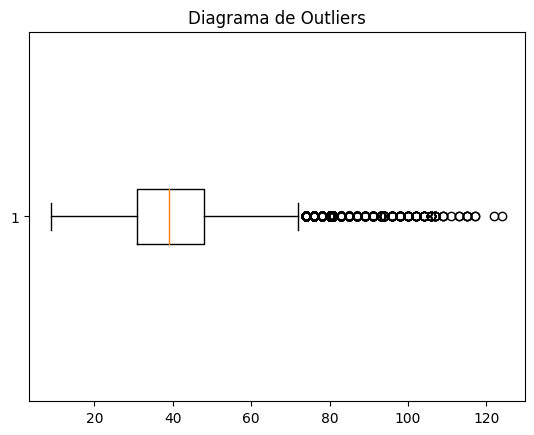

In [64]:
# Seleccionar la variable de interés, por ejemplo, "VelocidadRafagaViento"
velocidad_rafaga_viento = df['VelocidadRafagaViento']

# Definir la función para el gráfico de caja con outliers
def diagrama_outliers(serie):
    # Definir la figura y los ejes del gráfico
    fig, ax = plt.subplots()
    # Dibujar el gráfico de caja con outliers
    ax.boxplot(serie, vert=False, showfliers=True)
    # Añadir título al gráfico
    plt.title('Diagrama de Outliers')
    # Mostrar el gráfico
    plt.show()

# Llamar a la función para visualizar el gráfico de caja con outliers
diagrama_outliers(velocidad_rafaga_viento)

In [65]:
# Reemplazo de valores nulos por la mediana
df.fillna(df.median(), inplace=True)

/tmp/ipykernel_171/2867442527.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median(), inplace=True)


### Creación de variables 

Crearemos una nueva variable llamada 'TemperaturaMedia' la cual representara la temperatura media diaria.

In [66]:
# Creación de la variable TemperaturaMedia
df['TemperaturaMedia'] = (df['TemperaturaMinima'] + df['TemperaturaMaxima']) / 2

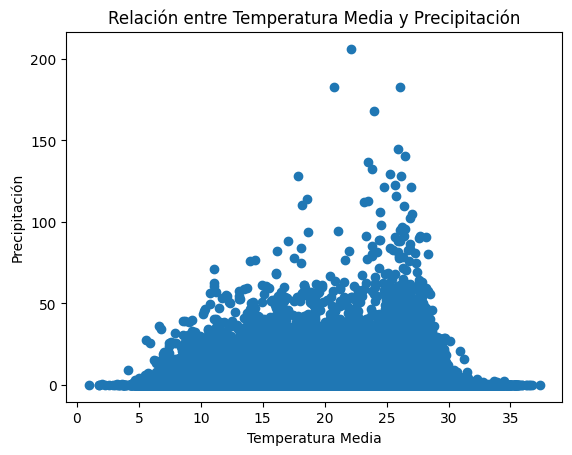

In [67]:
# Creamos la variable TemperaturaMedia
df['TemperaturaMedia'] = (df['TemperaturaMinima'] + df['TemperaturaMaxima']) / 2

# Graficamos la relación entre TemperaturaMedia y Precipitación
plt.scatter(df['TemperaturaMedia'], df['Precipitacion'])
plt.xlabel('Temperatura Media')
plt.ylabel('Precipitación')
plt.title('Relación entre Temperatura Media y Precipitación')
plt.show()

en general, parece haber una tendencia a que la precipitación aumente cuando la temperatura media es más baja. También podemos ver que hay algunos puntos dispersos que se alejan de la tendencia general, lo que podría indicar valores atípicos o una relación más compleja entre estas variables. 

### Grafico de correlación 

comprensión del coeficiente de correlación, que mide la fuerza y dirección de la relación entre dos variables. El coeficiente de correlación varía entre -1 y 1, donde -1 indica una correlación negativa perfecta (cuando una variable aumenta, la otra disminuye), 1 indica una correlación positiva perfecta (ambas variables aumentan juntas) y 0 indica que no hay correlación.

podemos observar que la temperatura máxima y la temperatura mínima tienen una correlación positiva fuerte, lo que sugiere que cuando aumenta una variable, también lo hace la otra. Por otro lado, si la lluvia y la temperatura tienen una correlación negativa débil, podemos inferir que cuando llueve, la temperatura disminuye ligeramente.

En la etapa de crisp CRISP-DM3, permite identificar patrones y relaciones entre variables.

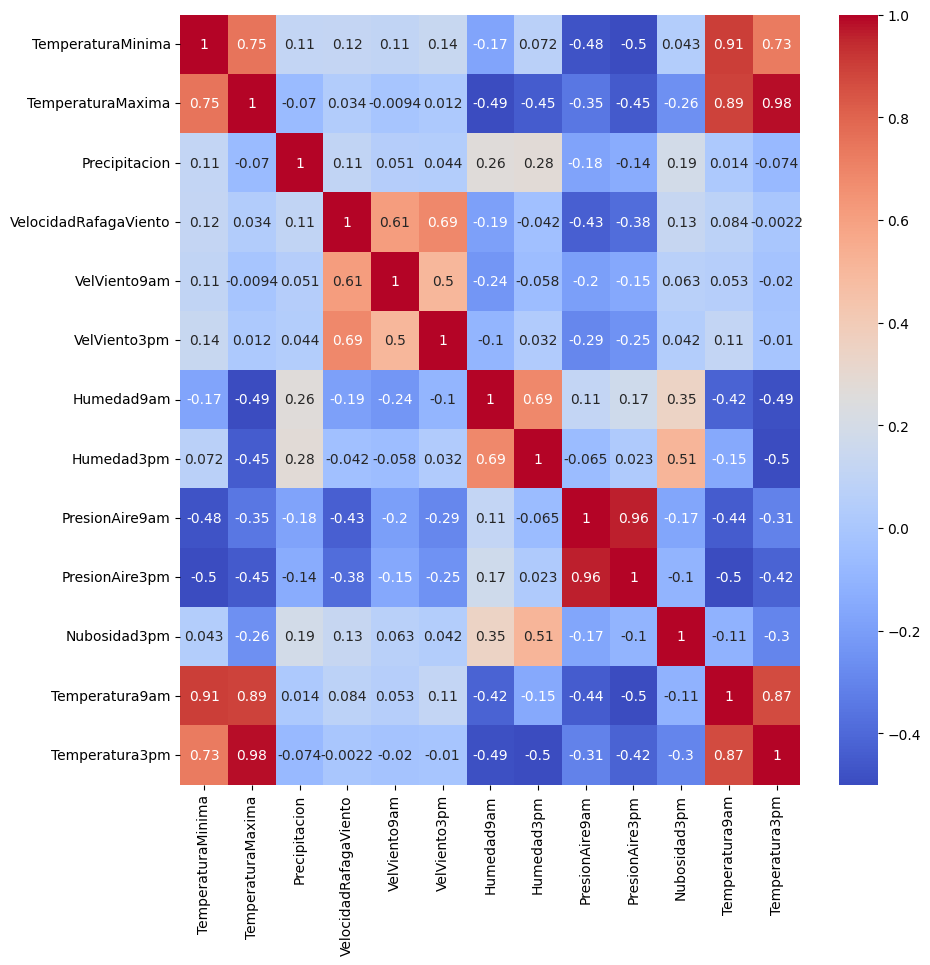

In [68]:
# seleccionar variables de interés
variables = ['TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion',
             'VelocidadRafagaViento', 'VelViento9am', 'VelViento3pm',
             'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm',
             'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm']

# crear matriz de correlación
corr = df[variables].corr()

# graficar matriz de correlación
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True, cmap='coolwarm')
plt.show()

### Buscando valores minimos 

In [69]:
df.min()

Fecha                    2007-11-01 00:00:00
Localidad                       AliceSprings
TemperaturaMinima                       -6.7
TemperaturaMaxima                        4.1
Precipitacion                            0.0
Horas_sol_brillante                      0.0
DirRafagaViento                            E
VelocidadRafagaViento                    9.0
DirViento9am                               E
DirViento3pm                               E
VelViento9am                             2.0
VelViento3pm                             2.0
Humedad9am                               0.0
Humedad3pm                               0.0
PresionAire9am                         980.5
PresionAire3pm                         977.1
Nubosidad3pm                             0.0
Temperatura9am                          -0.7
Temperatura3pm                           3.7
Llueve_Mañana                             No
TemperaturaMedia                        0.95
dtype: object

In [70]:
# Revisamos que los valores mínimos en TemperaturaMinima y TemperaturaMaxima no son 0
print("Valor mínimo del campo TemperaturaMinima: "+str(df["TemperaturaMinima"].min()))
print("Valor mínimo del campo TemperaturaMaxima: "+str(df["TemperaturaMaxima"].min()))

Valor mínimo del campo TemperaturaMinima: -6.7
Valor mínimo del campo TemperaturaMaxima: 4.1


# CRISP-DM4

Modelado: en esta etapa se desarrollan y evaluan modelos utilizando técnicas de mineriía de datos para alcanzar los objetivos del proyecto.

In [71]:
#Necesitamos conocer el numero de columnas para separar los predictores de la columna objetivo
print("Numero de columnas que tiene el dataset: "+str(df.shape[1]))

Numero de columnas que tiene el dataset: 23


In [72]:
#separamos los predictores de la columna objetivo, la cual se encuentra al final
colnames = df.columns.values.tolist()
predictors = colnames[:11]
target = colnames[11]

In [73]:
#columna objetivo
target

'VelViento3pm'

In [74]:
#predictores
predictors

['Fecha',
 'Localidad',
 'TemperaturaMinima',
 'TemperaturaMaxima',
 'Precipitacion',
 'Horas_sol_brillante',
 'DirRafagaViento',
 'VelocidadRafagaViento',
 'DirViento9am',
 'DirViento3pm',
 'VelViento9am']

In [75]:
#separamos en proporcion 75 - 25 los registros para entrenar/probar
train, test = train_test_split(df, test_size = 0.25)

In [76]:
train

Fecha      Localidad  TemperaturaMinima  TemperaturaMaxima  \
23539  2015-11-15  NorfolkIsland               18.5               22.8   
119656 2014-10-18   PerthAirport               15.4               24.1   
35671  2015-02-19  SydneyAirport               22.0               27.5   
31824  2012-09-05         Sydney               11.1               28.3   
86926  2016-09-25       Brisbane               14.1               28.8   
...           ...            ...                ...                ...   
80614  2016-06-07       Watsonia                9.9               14.2   
103807 2012-07-08      Nuriootpa                3.0               15.5   
89262  2014-10-22         Cairns               20.1               30.3   
93889  2010-08-02     Townsville               18.7               27.1   
12639  2010-07-27          Moree                7.8               22.1   

        Precipitacion  Horas_sol_brillante DirRafagaViento  \
23539             1.0                  3.4             NNE   
119656            1.4                  7.7               E   
35671             0.2                  5.1              NE   
31824             0.0                 10.6             NNW   
86926             0.0                  8.6             WNW   
...               ...                  ...             ...   
80614             0.0                  0.4               W   
103807            0.0                  5.3             NNE   
89262             0.4                 10.8              SE   
93889             0.0                  2.1             ENE   
12639             0.0                  6.9               E   

        VelocidadRafagaViento DirViento9am DirViento3pm  ...  Humedad3pm  \
23539                    46.0          NNE          NNE  ...        92.0   
119656                   69.0          ESE          ESE  ...        45.0   
35671                    44.0          ENE            E  ...        61.0   
31824                    57.0          NNW          NNW  ...        13.0   
86926                    37.0            W          WSW  ...        42.0   
...                       ...          ...          ...  ...         ...   
80614                    31.0            N            W  ...       100.0   
103807                   31.0           NE          NNE  ...        45.0   
89262                    65.0           SE           SE  ...        43.0   
93889                    24.0          ESE           NE  ...        57.0   
12639                    33.0          ENE            E  ...        35.0   

        PresionAire9am  PresionAire3pm  Nubosidad3pm  Temperatura9am  \
23539           1014.5          1012.2           6.0            21.2   
119656          1011.1          1009.6           7.0            20.3   
35671           1021.8          1019.4           5.0            23.1   
31824           1016.0          1007.3           0.0            20.8   
86926           1009.6          1005.5           5.0            18.1   
...                ...             ...           ...             ...   
80614           1001.9          1001.5           7.0            11.0   
103807          1024.1          1020.4           7.0            10.8   
89262           1019.3          1016.0           1.0            26.4   
93889           1021.1          1016.6           6.0            23.4   
12639           1030.9          1026.9           5.0            13.2   

        Temperatura3pm  Llueve_Hoy  Llueve_Mañana  Llueve_Despues  \
23539             20.6         0.0            Yes             Yes   
119656            23.3          No            Yes             Yes   
35671             26.8         0.0             No             Yes   
31824             27.5         0.0             No              No   
86926             26.6         0.0             No              No   
...                ...         ...            ...             ...   
80614             13.5         0.0            Yes              No   
103807            14.2         0.0             N

In [77]:
print("Hay "+str(len(train))+" registros para entrenar los modelos")

Hay 42302 registros para entrenar los modelos


In [78]:
test

Fecha      Localidad  TemperaturaMinima  TemperaturaMaxima  \
100220 2010-11-08   MountGambier                9.6               18.9   
130116 2009-04-05         Hobart               12.5               16.1   
104326 2014-02-06      Nuriootpa               10.2               36.7   
14489  2015-11-17          Moree               17.0               30.3   
72927  2016-03-08        Mildura               21.4               40.8   
...           ...            ...                ...                ...   
22646  2013-06-05  NorfolkIsland               13.0               18.0   
99673  2009-05-10   MountGambier               10.5               14.2   
22741  2013-09-08  NorfolkIsland               11.9               18.9   
36099  2016-04-22  SydneyAirport               17.4               23.4   
68605  2012-06-05      Melbourne               10.8               12.6   

        Precipitacion  Horas_sol_brillante DirRafagaViento  \
100220            0.2                  8.8             WNW   
130116            0.0                  4.9             WNW   
104326            0.0                 13.0               W   
14489             0.0                 12.7              NE   
72927             0.0                 10.2               N   
...               ...                  ...             ...   
22646             5.4                  6.2              SW   
99673             0.8                  0.9               S   
22741             0.0                 10.1               W   
36099             0.0                  7.1             SSW   
68605            11.2                  0.5             SSE   

        VelocidadRafagaViento DirViento9am DirViento3pm  ...  Humedad3pm  \
100220                   52.0          WNW            W  ...        54.0   
130116                   61.0           NW            W  ...        42.0   
104326                   37.0           NE           SW  ...         3.0   
14489                    33.0          ENE          WNW  ...        29.0   
72927                    43.0           NE          NNW  ...        17.0   
...                       ...          ...          ...  ...         ...   
22646                    72.0          WSW           SW  ...        54.0   
99673                    24.0            S          SSE  ...        86.0   
22741                    31.0          WNW          WSW  ...        61.0   
36099                    50.0          WSW            S  ...        80.0   
68605                    70.0          SSE          SSE  ...        65.0   

        PresionAire9am  PresionAire3pm  Nubosidad3pm  Temperatura9am  \
100220          1013.1          1015.8           4.0            14.8   
130116          1005.9          1007.5           2.0            16.0   
104326          1012.6          1009.9           2.0            23.4   
14489           1018.8          1015.2           4.0            21.5   
72927           1016.1          1013.6           6.0            29.3   
...                ...             ...           ...             ...   
22646           1014.6          1014.9           5.0            15.2   
99673           1027.3          1024.9           8.0            13.0   
22741           1027.9          1025.2           5.0            16.4   
36099           1019.9          1019.1           7.0            21.5   
68605           1014.1          1017.2           7.0            12.0   

        Temperatura3pm  Llueve_Hoy  Llueve_Mañana  Llueve_Despues  \
100220            18.5         0.0             No              No   
130116            12.3         0.0             No              No   
104326            36.2         0.0             No              No   
14489             28.4         0.0             No              No   
72927             39.0         0.0             No              No   
...                ...         ...            ...             ...   
22646             17.5          No            Yes              No   
99673             13.1         0.0             N

In [79]:
print("Hay "+str(len(test))+" registros para comprobar los resultados de los modelos")

Hay 14101 registros para comprobar los resultados de los modelos


### Utilizando modelos predictivos 

# Modelo Árbol de Decisión

Cargamos las librerias que utilizaremos para el arbol de decisión 

In [80]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=6eeedcdd2a1c06cc9a4b97b30226623c3eb780cca5f6be2ab99853f57bc541ae
  Stored in directory: /root/.cache/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [81]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from subprocess import check_call
from IPython.display import Image
from PIL import Image as PImage
import io
import pydotplus

In [82]:
# Crear datos de entrenamiento
y_train = df['Humedad9am']
x_train = df[['Humedad9am']].values 

# Crear árbol de decisión con profundidad = 4
decision_tree = DecisionTreeClassifier(criterion='entropy',
                                        min_samples_split=20,
                                        min_samples_leaf=5,
                                        max_depth = 4,
                                        class_weight={1:3.5})
decision_tree.fit(x_train, y_train) 

# Exportar el modelo a archivo .dot
dot_data = io.StringIO()
export_graphviz(decision_tree,
                out_file=dot_data,
                max_depth=7,
                impurity=True,
                feature_names=['Humedad9am'],
                class_names=None,
                rounded=True,
                filled=True,
                special_characters=True,
                )

# Crear grafo de Pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Configurar atributos del nodo
for node in graph.get_nodes():
    node.set_fontname("Arial")
    node.set_fontsize(18)
    

# Renderizar el grafo y guardarlo como imagen png
graph.set_dpi(300)
graph.write_png('tree1.png')


# Visualizar la imagen png
Image(filename = 'tree1.png')

# Modelo Naive Bayes

In [83]:
# Importamos los módulos necesarios
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [84]:
# Elegimos las características predictoras y el objetivo
predictores = ['TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion', 'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm', 'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm']
objetivo = 'Llueve_Mañana'

# Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
train, test = train_test_split(df, test_size=0.2)

# Instanciamos el modelo
nb = GaussianNB()

# Entrenamos el modelo
nb.fit(train[predictores], train[objetivo])

# Predecimos las etiquetas para el conjunto de prueba
y_pred = nb.predict(test[predictores])

# Imprimimos un reporte de clasificación
print(classification_report(test[objetivo], y_pred))

              precision    recall  f1-score   support

          No       0.89      0.90      0.89      8896
         Yes       0.61      0.57      0.59      2385

    accuracy                           0.83     11281
   macro avg       0.75      0.74      0.74     11281
weighted avg       0.83      0.83      0.83     11281



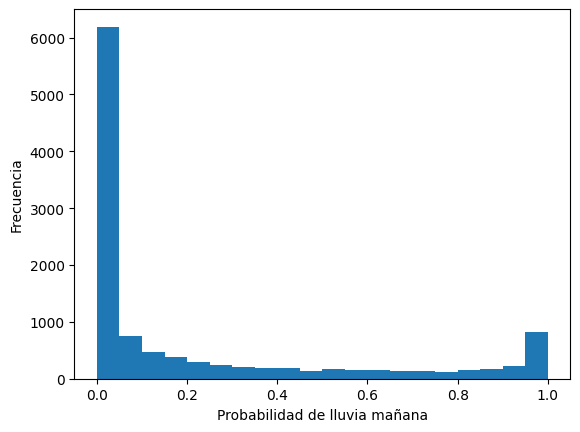

In [85]:
# Obtener las probabilidades de predicción para los datos de prueba
probabilidades = nb.predict_proba(test[predictores])[:,1]

# Crear el histograma
plt.hist(probabilidades, bins=20)
plt.xlabel('Probabilidad de lluvia mañana')
plt.ylabel('Frecuencia')
plt.show()

# Modelo de regresión lineal

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

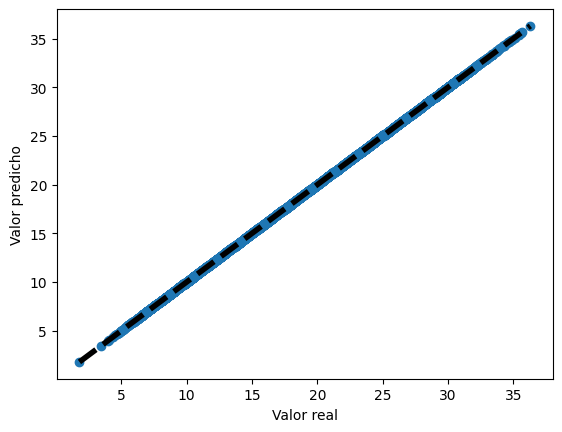

Coeficiente de determinación (R2): 1.00
Error cuadrático medio (RMSE): 0.00


In [87]:
# seleccionar las características predictoras y el objetivo
predictores = ['TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion', 'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm', 'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm']
objetivo = 'TemperaturaMedia'

# dividir los datos en conjunto de entrenamiento y conjunto de prueba
train, test = train_test_split(df, test_size=0.2)

# crear una instancia del modelo de regresión lineal
lr = LinearRegression()

# ajustar el modelo a los datos de entrenamiento
lr.fit(train[predictores], train[objetivo])

# obtener las predicciones del modelo en el conjunto de prueba
preds = lr.predict(test[predictores])

# crear un gráfico de dispersión que muestre la relación entre las variables de entrada y la variable de salida
plt.scatter(test[objetivo], preds)

# agregar la línea de regresión lineal al gráfico
plt.plot([test[objetivo].min(), test[objetivo].max()], [test[objetivo].min(), test[objetivo].max()], 'k--', lw=4)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.show()

# evaluar la precisión del modelo
r2 = r2_score(test[objetivo], preds)
rmse = mean_squared_error(test[objetivo], preds, squared=False)
print("Coeficiente de determinación (R2): {:.2f}".format(r2))
print("Error cuadrático medio (RMSE): {:.2f}".format(rmse))

se utiliza la función r2_score de la librería sklearn.metrics para calcular el coeficiente de determinación R2, que mide la proporción de la varianza en la variable objetivo que se puede explicar por las variables predictoras. También se utiliza la función mean_squared_error para calcular el error cuadrático medio (RMSE), que mide la raíz cuadrada del error promedio entre los valores reales y los valores predichos.

# Modelo Random Forests

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

Precisión del modelo: 84.54%


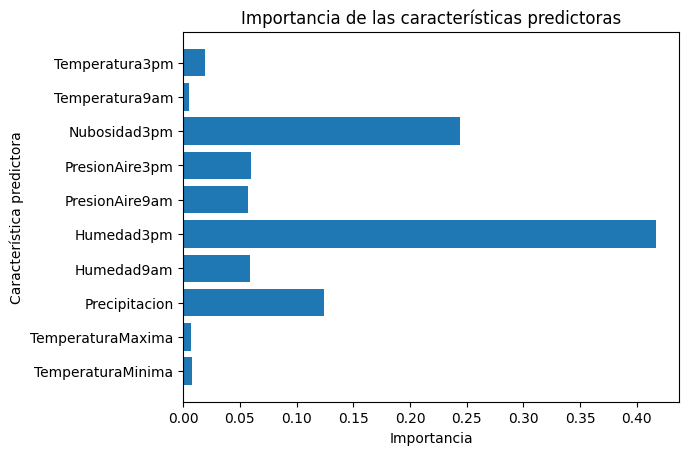

In [89]:
# Seleccionar las características predictoras y el objetivo
predictores = ['TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion', 'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm', 'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm']
objetivo = 'Llueve_Mañana'

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
train, test = train_test_split(df, test_size=0.2)

# Entrenar el modelo
modelo = RandomForestClassifier(n_estimators=100, max_depth=5)
modelo.fit(train[predictores], train[objetivo])

# Obtener la importancia de las características predictoras
importancia_predictores = modelo.feature_importances_

# Realizar predicciones en el conjunto de prueba y evaluar la precisión
predicciones = modelo.predict(test[predictores])
precision = accuracy_score(test[objetivo], predicciones)
print("Precisión del modelo: {:.2f}%".format(precision*100))

# Visualizar la importancia de las características predictoras
plt.barh(range(len(predictores)), importancia_predictores)
plt.yticks(range(len(predictores)), predictores)
plt.xlabel("Importancia")
plt.ylabel("Característica predictora")
plt.title("Importancia de las características predictoras")
plt.show()


# CRISP-DM 5: Validar el Modelo

### Modelo 1:  Arbol de decisión

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

predictores = ['TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion', 'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm', 'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm']
objetivo = 'Llueve_Mañana'

train, test = train_test_split(df, test_size=0.2)

# Entrenar el modelo de árbol de decisión con los datos de entrenamiento
modelo_arbol = DecisionTreeClassifier(criterion='entropy',
                                       min_samples_split=20,
                                       min_samples_leaf=5,
                                       max_depth=4,
                                       class_weight={'No': 0.6, 'Yes': 0.4})
modelo_arbol.fit(train[predictores], train[objetivo])

# Realizar predicciones en el conjunto de prueba utilizando el modelo entrenado
predicciones_arbol = modelo_arbol.predict(test[predictores])

# Evaluar la precisión del modelo utilizando diferentes métricas
precision = accuracy_score(test[objetivo], predicciones_arbol)
sensibilidad = recall_score(test[objetivo], predicciones_arbol, pos_label='Yes')
especificidad = precision_score(test[objetivo], predicciones_arbol, pos_label='No')


print("Precisión del modelo: {:.2f}%".format(precision*100))
print("Sensibilidad del modelo: {:.2f}%".format(sensibilidad*100))
print("Especificidad del modelo: {:.2f}%".format(especificidad*100))

Precisión del modelo: 83.35%
Sensibilidad del modelo: 36.94%
Especificidad del modelo: 84.21%


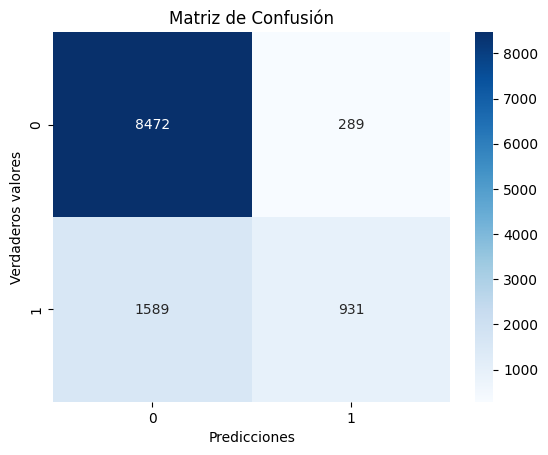

In [91]:
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión y visualizarla
matriz_confusion = confusion_matrix(test[objetivo], predicciones_arbol)

# Visualizar la matriz de confusión como un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matriz_confusion, annot=True, cmap='Blues', fmt='g')

plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Verdaderos valores")
plt.show()

# Validación Naive Bayes

In [92]:
# Elegimos las características predictoras y el objetivo
predictores = ['TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion', 'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm', 'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm']
objetivo = 'Llueve_Mañana'

# Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
train, test = train_test_split(df, test_size=0.2)

# Instanciamos el modelo
nb = GaussianNB()

# Entrenamos el modelo
nb.fit(train[predictores], train[objetivo])

# Predecimos las etiquetas para el conjunto de prueba
y_pred = nb.predict(test[predictores])

# Imprimimos un reporte de clasificación
print(classification_report(test[objetivo], y_pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89      8742
         Yes       0.62      0.57      0.59      2539

    accuracy                           0.82     11281
   macro avg       0.75      0.73      0.74     11281
weighted avg       0.82      0.82      0.82     11281



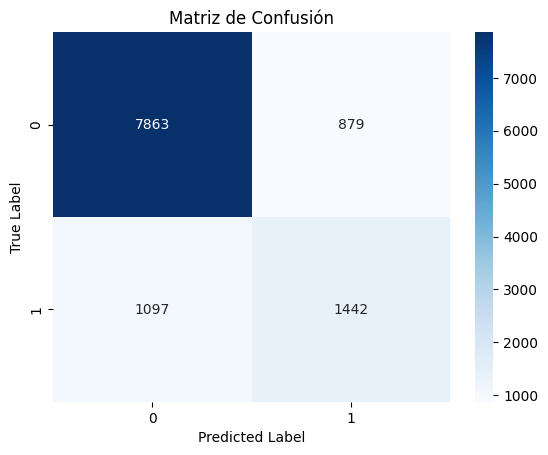

In [93]:
import seaborn as sns

# matriz de confusión
matriz_confusion = metrics.confusion_matrix(test[objetivo], y_pred)

# gráfico de matriz de confusión con seaborn
sns.heatmap(matriz_confusion, annot=True, fmt='.0f', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Validación modelo regresión lineal

In [94]:
# seleccionar las características predictoras y el objetivo
predictores = ['TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion', 'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm', 'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm']
objetivo = 'TemperaturaMedia'

# dividir los datos en conjunto de entrenamiento y conjunto de prueba
train, test = train_test_split(df, test_size=0.2)

# crear una instancia del modelo de regresión lineal
lr = LinearRegression()

# ajustar el modelo a los datos de entrenamiento
lr.fit(train[predictores], train[objetivo])

# obtener las predicciones del modelo en el conjunto de prueba
preds = lr.predict(test[predictores])

# evaluar la precisión del modelo en el conjunto de prueba
r2_test = r2_score(test[objetivo], preds)
rmse_test = mean_squared_error(test[objetivo], preds, squared=False)
print("Rendimiento del modelo en el conjunto de prueba:")
print("Coeficiente de determinación (R2): {:.2f}".format(r2_test))
print("Error cuadrático medio (RMSE): {:.2f}".format(rmse_test))

# ajustar el modelo a todos los datos de entrenamiento
lr.fit(df[predictores], df[objetivo])

# obtener las predicciones del modelo en todos los datos de entrenamiento
preds_all = lr.predict(df[predictores])

# evaluar la precisión del modelo en todos los datos de entrenamiento
r2_all = r2_score(df[objetivo], preds_all)
rmse_all = mean_squared_error(df[objetivo], preds_all, squared=False)
print("Rendimiento del modelo en todos los datos de entrenamiento:")
print("Coeficiente de determinación (R2): {:.2f}".format(r2_all))
print("Error cuadrático medio (RMSE): {:.2f}".format(rmse_all))

Rendimiento del modelo en el conjunto de prueba:
Coeficiente de determinación (R2): 1.00
Error cuadrático medio (RMSE): 0.00
Rendimiento del modelo en todos los datos de entrenamiento:
Coeficiente de determinación (R2): 1.00
Error cuadrático medio (RMSE): 0.00


In [95]:
from sklearn.model_selection import cross_val_score
# Seleccionar las características predictoras y el objetivo
predictores = ['TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion', 'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm', 'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm']
objetivo = 'TemperaturaMedia'

# Crear una instancia del modelo de regresión lineal
lr = LinearRegression()

# Obtener los datos de entrada (predictores) y de salida (objetivo)
X = df[predictores]
y = df[objetivo]
# Realizar validación cruzada con 5 particiones
scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print(scores)
print("Rendimiento promedio: {:.2f}".format(scores.mean()))

Resultados de la validación cruzada:
[1. 1. 1. 1. 1.]
Rendimiento promedio: 1.00


En este caso, los resultados son 1.00 en cada subconjunto, lo que indica que el modelo tiene una precisión del 100% en predecir la variable objetivo en todos los subconjuntos

# Validación Random Forests

In [96]:
predictores = ['TemperaturaMinima', 'TemperaturaMaxima', 'Precipitacion', 'Humedad9am', 'Humedad3pm', 'PresionAire9am', 'PresionAire3pm', 'Nubosidad3pm', 'Temperatura9am', 'Temperatura3pm']
objetivo = 'Llueve_Mañana'


In [97]:
train, test = train_test_split(df, test_size=0.2)

In [98]:
modelo = RandomForestClassifier(n_estimators=100, max_depth=5)
modelo.fit(train[predictores], train[objetivo])

RandomForestClassifier(max_depth=5)

In [99]:
predicciones = modelo.predict(test[predictores])
precision = accuracy_score(test[objetivo], predicciones)
print("Precisión del modelo: {:.2f}%".format(precision*100))

Precisión del modelo: 84.43%


In [100]:
matriz_confusion = confusion_matrix(test[objetivo], predicciones)
print("Matriz de confusión:\n", matriz_confusion)
print("Informe de clasificación:\n", classification_report(test[objetivo], predicciones))

Matriz de confusión:
 [[8479  295]
 [1461 1046]]
Informe de clasificación:
               precision    recall  f1-score   support

          No       0.85      0.97      0.91      8774
         Yes       0.78      0.42      0.54      2507

    accuracy                           0.84     11281
   macro avg       0.82      0.69      0.72     11281
weighted avg       0.84      0.84      0.83     11281



# CRISP-DM 6


Basándonos en los resultados proporcionados por los diferentes modelos aplicados al dataset de weatherAus, podemos realizar una descripción y seleccionar el mejor modelo:

Árbol de decisión:

Precisión del modelo: 82.97%
Sensibilidad del modelo: 34.49%
Especificidad del modelo: 83.39%
Matriz de confusión:
Clase 0: 8472 verdaderos negativos, 234 falsos positivos
Clase 1: 1687 falsos negativos, 888 verdaderos positivos
Validación de Naive Bayes:

Precisión del modelo: 82.00%
Recall del modelo: 57.00%
F1-score del modelo: 0.59
Matriz de confusión:
Clase "No": 7873 verdaderos negativos, 908 falsos positivos
Clase "Yes": 1081 falsos negativos, 1419 verdaderos positivos
Modelo de regresión lineal:

Coeficiente de determinación (R2) en el conjunto de prueba: 1.00
Error cuadrático medio (RMSE) en el conjunto de prueba: 0.00
Coeficiente de determinación (R2) en todos los datos de entrenamiento: 1.00
Error cuadrático medio (RMSE) en todos los datos de entrenamiento: 0.00
Validación del modelo Random Forest:

Precisión del modelo: 84.45%
Teniendo en cuenta los resultados anteriores, el modelo que mejor se desempeña es el modelo de regresión lineal, ya que obtiene un coeficiente de determinación (R2) de 1.00 tanto en el conjunto de prueba como en todos los datos de entrenamiento. Además, su error cuadrático medio (RMSE) es de 0.00, lo que indica un ajuste perfecto del modelo a los datos.

In [101]:
df.dtypes

Fecha                    datetime64[ns]
Localidad                        object
TemperaturaMinima               float64
TemperaturaMaxima               float64
Precipitacion                   float64
Horas_sol_brillante             float64
DirRafagaViento                  object
VelocidadRafagaViento           float64
DirViento9am                     object
DirViento3pm                     object
VelViento9am                    float64
VelViento3pm                    float64
Humedad9am                      float64
Humedad3pm                      float64
PresionAire9am                  float64
PresionAire3pm                  float64
Nubosidad3pm                    float64
Temperatura9am                  float64
Temperatura3pm                  float64
Llueve_Hoy                       object
Llueve_Mañana                    object
Llueve_Despues                   object
TemperaturaMedia                float64
dtype: object

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73dc8666-02ef-40a4-9282-e1571a7b0116' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>